## **PROYECTO FINAL**
Diaz Gaston Alejandro - DNI: 32016726

# **1.- Introducción**

Debo expresar que todo lo que continue se expresara a modo hipótetico debido a que nada de lo que se exprese sera real, ya que en el desarrollo de este trabajo se utilizó un dataset obtenido de forma gratuita desde la plataforma web de Kaggle, con datos sobre las ventas de un supermercado. La idea es poder demostrar las habilidades obtenidas de la realizacion del bootcamp de Ciencia de Datos de la 4ta generacion de codigofacilito.

# **2.- Definición de objetivo**#

El Objetivo es armar un modelo que permita predecir el consumo de un cliente segun las condiciones, situacion o atributos del mismo.



# **3.- Conociendo el Dataset**#






Descripción: El presente dataset, es resultado del levantamiento de un estudio de marketing sobre una cantidad importante de personas, con datos de edad, nivel educacional, cituación marital entre otras variables.

Objetivo del analisis: Determinar en función de los datos obtenidos de consumo, la caracterización de las personas más proclives a comprar un producto.

En el presente Dataset se observan un total de 29 columnas (considerando el ID) y un total de 2215 filas, al visualizar las primeras 6 filas se observan los
primeros datos consignados, ordenados por un campo index llamado ID.

Cada columa proporciona detalles específicos sobre los clientes y su consumo. 3 de ellas estan en tipo object que mas tarde trabajaremos, pero antes a modo de indice y consulta hara una breve descripción de cada columna que podria usar.

*   **Una descripción detallada de cada una de las columnas**

Year_Birth = Es un dato tipo entero, contiene los años de nacimiento de las personas encuestadas.

Education = Es un dato tipo texto, contiene el nivel maximo educativo alcanzado por las personas encuestadas.

Marital_Status = Es un dato tipo texto, contiene el estado marital de las personas encuestadas.

Income = Es un dato tipo entero, contiene el ingreso de las personas encuestadas.

Kidhome = Es un dato tipo entero, contiene el número de niños que viven en el mismo hogar que las personas encuestadas.

Teenhome = Es un dato tipo entero, contiene el número de adolescentes que viven en el mismo hogar que las personas encuestadas.

Dt_Customer = Es un dato tipo texto, contiene la fecha en que la persona encuestada fue ingresada a la campaña.

Recency = Es un dato tipo entero, contiene el número de dias de la ultima compra de la persona encuestada.

MntWines = Es un dato tipo entero, contiene el monto gastado en vinos en los ultimos 2 años.

MntFruits = Es un dato tipo entero, contiene el monto gastado en frutas en los ultimos 2 años.

MntMeatProducts = Es un dato tipo entero, contiene el monto gastado en carnes en los ultimos 2 años.

MntFishProducts = Es un dato tipo entero, contiene el monto gastado en fish en los ultimos 2 años.

MntSweetProducts = Es un dato tipo entero, contiene el monto en dulces en los ultimos 2 años.

MntGoldProds = Es un dato tipo entero, contiene el monto en productos etiquetados como premium en los ultimos 2 años.

NumDealsPurchases = Es un dato tipo entero, contiene el número de compras realizadas con un porcentaje de descuento.

*   **Etapa 0: Preparación del ambiente**

Detalle: Se comienza instalando aplicativo, luego importando las librerias y el dataset a utilizar.

In [97]:
#Librerias básica para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Nota 1: Paso previo, cargar o subir el Set de Datos, en este caso es un archivo de tipo CSV llamado datos-marketing.csv**

In [98]:
# Cargando los datos del CSV en un Dataframe
#df_1 = pd.read_csv("C:/Users/GASTON/Desktop/Proyecto/ProjectDiazGaston/datos-marketing.csv", sep = ";")
df_1 = pd.read_csv("/content/datos-marketing.csv", sep = ";")

# Trabajare los datos en una copia
df_marketing = df_1.copy()


In [99]:
#Dimension del dataset
print(df_marketing.shape)

(2215, 29)


In [100]:
df_marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [101]:
#Tipo de dato para cada columna
df_marketing.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
dtype: object

In [102]:
#Veamos las primeras 6 filas
df_marketing.head(6)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   1503        1976         PhD       Together  162397        1         1   
1   1501        1982         PhD        Married  160803        0         0   
2   5336        1971      Master       Together  157733        1         0   
3   8475        1973         PhD        Married  157243        0         1   
4   4931        1977  Graduation       Together  157146        0         0   
5  11181        1949         PhD        Married  156924        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  03-06-2013       31        85  ...                  1             0   
1  04-08-2012       21        55  ...                  0             0   
2  04-06-2013       37        39  ...                  1             0   
3  01-03-2014       98        20  ...                  0             0   
4  29-04-2013       13         1  ...                  1             0   
5  29-08-2013       85         2  ...                  0             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  

[6 rows x 29 columns]

In [103]:
#Veamos las 5 ultimas filas
df_marketing.tail(6)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
2209   3955        1965  Graduation       Divorced    4861        0         0   
2210  10311        1969  Graduation        Married    4428        0         1   
2211   9931        1963         PhD        Married    4023        1         1   
2212  11110        1973  Graduation         Single    3502        1         0   
2213   5376        1979  Graduation        Married    2447        1         0   
2214   6862        1971  Graduation       Divorced    1730        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
2209  22-06-2014       20         2  ...                 14             0   
2210  05-10-2013        0        16  ...                  1             0   
2211  23-06-2014       29         5  ...                 19             0   
2212  13-04-2013       56         2  ...                 14             0   
2213  06-01-2013       42         1  ...                  1             0   
2214  18-05-2014       65         1  ...                 20             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2209             0             0             0             0         0   
2210             0             0             0             0         0   
2211             0             0             0             0         0   
2212             0             0             0             0         0   
2213             0             0             0             0         0   
2214             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
2209              3         11         0  
2210              3         11         0  
2211              3         11         0  
2212              3         11         0  
2213              3         11         0  
2214              3         11         0  

[6 rows x 29 columns]

*   **Etapa 1: verificación de la calidad de los datos:**

Antes de comenzar cualquier análisis, se revisan los datos, buscando información faltante; y en caso de existan, decidir qué es lo que se puede realizar con esos registros faltantes. Con los dataframes de pandas, se puede usar la función info() para encontrar datos faltantes.


In [104]:
# Revisión de cuantos valores no nulos existen en cada variable
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2215 non-null   int64 
 1   Year_Birth           2215 non-null   int64 
 2   Education            2215 non-null   object
 3   Marital_Status       2215 non-null   object
 4   Income               2215 non-null   int64 
 5   Kidhome              2215 non-null   int64 
 6   Teenhome             2215 non-null   int64 
 7   Dt_Customer          2215 non-null   object
 8   Recency              2215 non-null   int64 
 9   MntWines             2215 non-null   int64 
 10  MntFruits            2215 non-null   int64 
 11  MntMeatProducts      2215 non-null   int64 
 12  MntFishProducts      2215 non-null   int64 
 13  MntSweetProducts     2215 non-null   int64 
 14  MntGoldProds         2215 non-null   int64 
 15  NumDealsPurchases    2215 non-null   int64 
 16  NumWeb

In [105]:
#Se puede generar una contra validación, esto es revisando comparando la totalidad de registros por columnas
df_marketing.count()

ID                     2215
Year_Birth             2215
Education              2215
Marital_Status         2215
Income                 2215
Kidhome                2215
Teenhome               2215
Dt_Customer            2215
Recency                2215
MntWines               2215
MntFruits              2215
MntMeatProducts        2215
MntFishProducts        2215
MntSweetProducts       2215
MntGoldProds           2215
NumDealsPurchases      2215
NumWebPurchases        2215
NumCatalogPurchases    2215
NumStorePurchases      2215
NumWebVisitsMonth      2215
AcceptedCmp3           2215
AcceptedCmp4           2215
AcceptedCmp5           2215
AcceptedCmp1           2215
AcceptedCmp2           2215
Complain               2215
Z_CostContact          2215
Z_Revenue              2215
Response               2215
dtype: int64

In [106]:
#Antes de proceder con el analisis de los principales conceptos estadísticos, se procede a verificar la estructura de dato corresponde a un dataframe!
type(df_marketing)

pandas.core.frame.DataFrame

# **4.- Analisis Exploratorio de Datos (EDA)**#


A continuacion dejo link a pagina para visualizar los datos del dataset en PowerBi:

https://app.powerbi.com/view?r=eyJrIjoiYWU5YmFkNzQtODE0Ny00ZjAzLTg4MmMtMTY2Y2U4MjgxYWUxIiwidCI6ImM5ZDIyNWY0LTlhN2QtNDExNy1hZWQ1LTYwMTI2YjIxOTA0MiIsImMiOjR9

*   **Se procede a analizar el dataset**


In [107]:
df_marketing.describe()


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2215.000000  2215.000000    2215.000000  2215.000000  2215.000000   
mean    5586.618059  1968.816704   51969.861400     0.441535     0.505643   
std     3249.082838    11.987000   21526.320095     0.536886     0.544198   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.500000  1959.000000   35284.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51373.000000     0.000000     0.000000   
75%     8419.000000  1977.000000   68487.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2215.000000  2215.000000  2215.000000      2215.000000   
mean     49.024379   305.225282    26.361625       167.063205   
std      28.949608   337.345380    39.802036       224.311559   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   175.000000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.500000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2215.000000  ...        2215.000000   2215.000000   2215.000000   
mean         37.651016  ...           5.318736      0.073589      0.074041   
std          54.760822  ...           2.425863      0.261160      0.261896   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2215.000000   2215.000000   2215.000000  2215.000000         2215.0   
mean       0.073138      0.064108      0.013544     0.009481            3.0   
std        0.260421      0.245001      0.115614     0.096929            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2215.0  2215.000000  
mean        11.0     0.150339  
std          0.0     0.357484  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

*   **Con fines de comparación se evalua la funcion round para visualizar ajustar los datos redondeados versus los sin redondear**


In [108]:
df_marketing.describe().round()

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count   2215.0      2215.0    2215.0   2215.0    2215.0   2215.0    2215.0   
mean    5587.0      1969.0   51970.0      0.0       1.0     49.0     305.0   
std     3249.0        12.0   21526.0      1.0       1.0     29.0     337.0   
min        0.0      1893.0    1730.0      0.0       0.0      0.0       0.0   
25%     2814.0      1959.0   35284.0      0.0       0.0     24.0      24.0   
50%     5455.0      1970.0   51373.0      0.0       0.0     49.0     175.0   
75%     8419.0      1977.0   68487.0      1.0       1.0     74.0     505.0   
max    11191.0      1996.0  162397.0      2.0       2.0     99.0    1493.0   

       MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
count     2215.0           2215.0           2215.0  ...             2215.0   
mean        26.0            167.0             38.0  ...                5.0   
std         40.0            224.0             55.0  ...                2.0   
min          0.0              0.0              0.0  ...                0.0   
25%          2.0             16.0              3.0  ...                3.0   
50%          8.0             68.0             12.0  ...                6.0   
75%         33.0            232.0             50.0  ...                7.0   
max        199.0           1725.0            259.0  ...               20.0   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count        2215.0        2215.0        2215.0        2215.0        2215.0   
mean            0.0           0.0           0.0           0.0           0.0   
std             0.0           0.0           0.0           0.0           0.0   
min             0.0           0.0           0.0           0.0           0.0   
25%             0.0           0.0           0.0           0.0           0.0   
50%             0.0           0.0           0.0           0.0           0.0   
75%             0.0           0.0           0.0           0.0           0.0   
max             1.0           1.0           1.0           1.0           1.0   

       Complain  Z_CostContact  Z_Revenue  Response  
count    2215.0         2215.0     2215.0    2215.0  
mean        0.0            3.0       11.0       0.0  
std         0.0            0.0        0.0       0.0  
min         0.0            3.0       11.0       0.0  
25%         0.0            3.0       11.0       0.0  
50%         0.0            3.0       11.0       0.0  
75%         0.0            3.0       11.0       0.0  
max         1.0            3.0       11.0       1.0  

[8 rows x 26 columns]

Text(0.5, 1.0, 'Histograma de Edad')

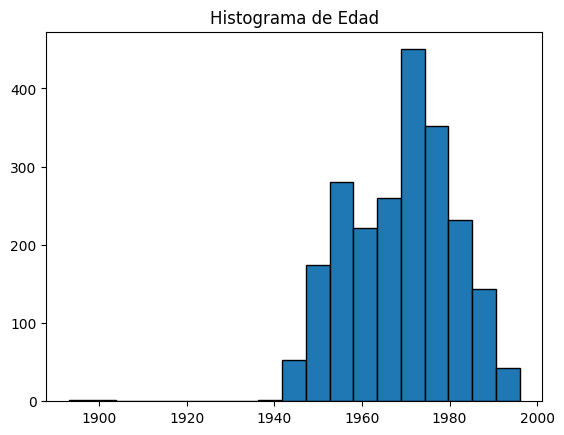

In [109]:
#Histograma
plt.hist(x=df_marketing.Year_Birth, bins=19, edgecolor="black")
plt.title('Histograma de Edad')


Text(0.5, 1.0, 'Histograma de Niños en Casa')

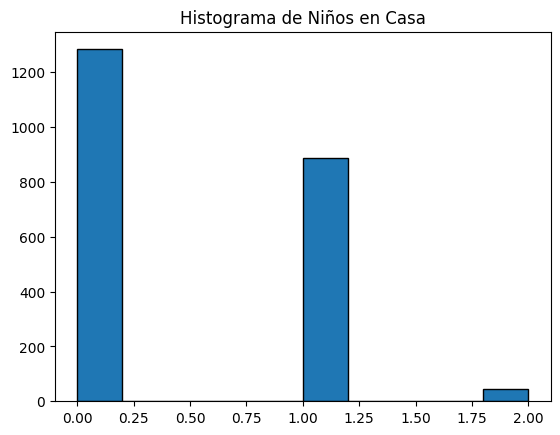

In [110]:
#Histograma
plt.hist(x=df_marketing.Kidhome, edgecolor="black")
plt.title('Histograma de Niños en Casa')

Text(0.5, 1.0, 'Histograma de Estado Civil')

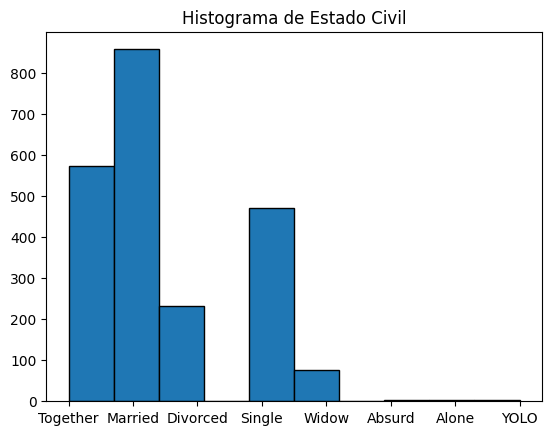

In [111]:
#Histograma
plt.hist(x=df_marketing.Marital_Status, edgecolor="black")
plt.title('Histograma de Estado Civil')

Text(0.5, 1.0, 'Histograma de Educacion')

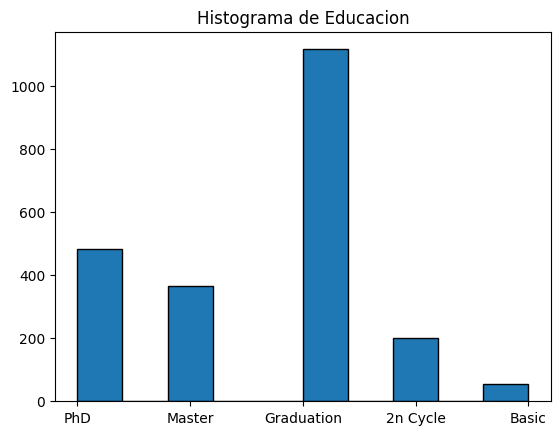

In [112]:
#Histograma
plt.hist(x=df_marketing.Education, edgecolor="black")
plt.title('Histograma de Educacion')

In [113]:
#El ingreso "Income" es otra variable identificada como relevante dentro del presente analisis.
est_desc=df_marketing["Income"].describe()
est_desc

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Distribución de Edad v/s Ingreso')

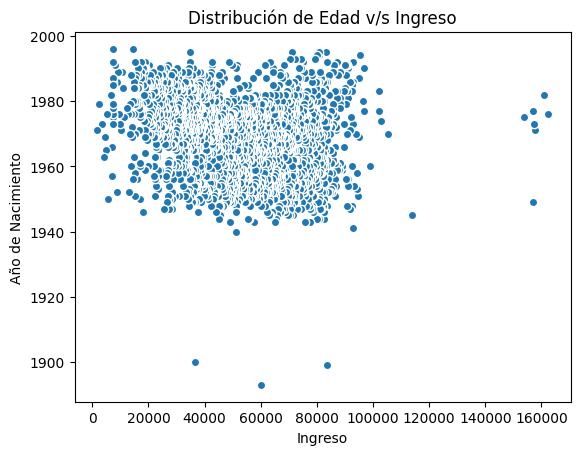

In [114]:
plt.scatter(x=df_marketing.Income, y=df_marketing.Year_Birth, edgecolors="white")
plt.xlabel("Ingreso")
plt.ylabel("Año de Nacimiento")
plt.title('Distribución de Edad v/s Ingreso')

BREVE CONCLUSION SOBRE LOS CONSUMIDORES...

Los histograma nos demuestra cómo esta distribuida nuestra poblacion de acuerdo a su edad, estado civil, estudios y niños en casa.
La mayor cantidad de nuestros consumidores nacieron entre 1950 y 1990, una buena parte de ellos estan en pareja (Casados o conviviendo) y otra parte viviendos solos (solteros, viudos, divorciados).
Por otro lado, la mayoria de los clientes o bien no tiene niños en casa o solo tiene un niño en casa.
Por ultimo los ingresos  de los consumidores varian, pero en general estan englobados entre 35000 y 70000 pesos.

Text(0.5, 1.0, 'Distribución de Consumo de Vino v/s Ingreso')

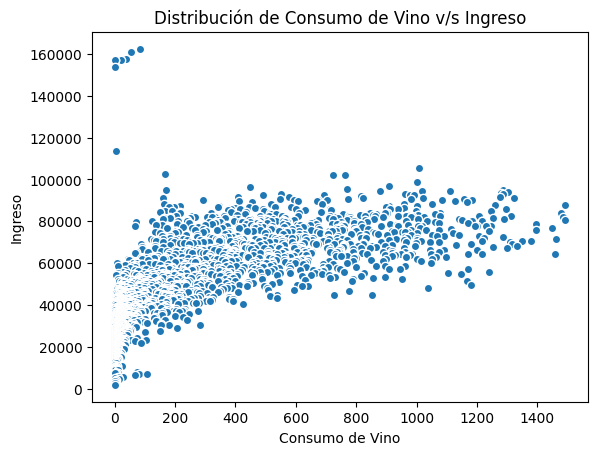

In [115]:
plt.scatter(x=df_marketing.MntWines, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Vino")
plt.ylabel("Ingreso")
plt.title('Distribución de Consumo de Vino v/s Ingreso')

Text(0.5, 1.0, 'Distribución de Consumo de Carnes v/s Ingreso')

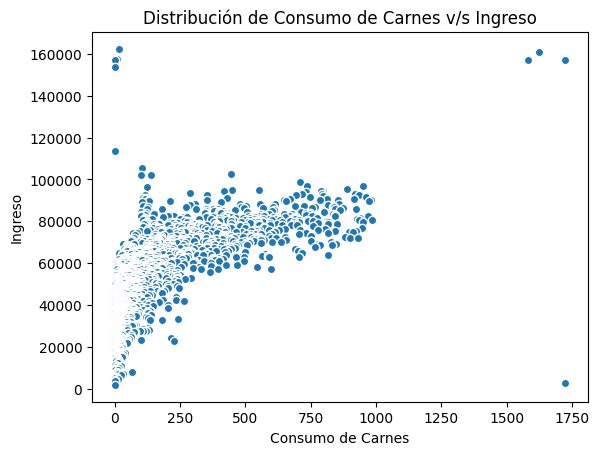

In [116]:
plt.scatter(x=df_marketing.MntMeatProducts, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Carnes")
plt.ylabel("Ingreso")
plt.title('Distribución de Consumo de Carnes v/s Ingreso')

Text(0.5, 1.0, 'Distribución de Consumo de Pescado v/s Ingreso')

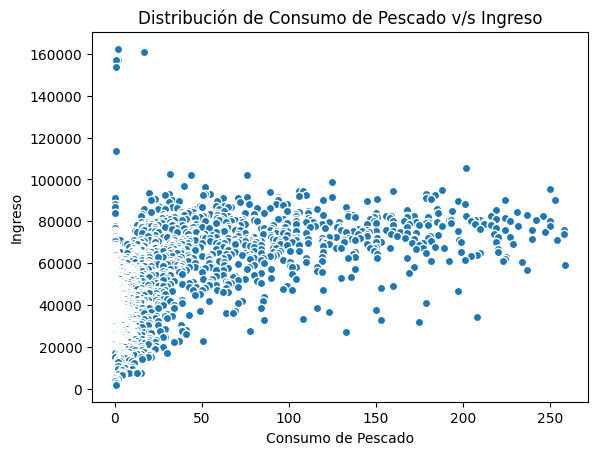

In [117]:
plt.scatter(x=df_marketing.MntFishProducts, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Pescado")
plt.ylabel("Ingreso")
plt.title('Distribución de Consumo de Pescado v/s Ingreso')

Text(0.5, 1.0, 'Distribución de Consumo de Cosas Dulces v/s Ingreso')

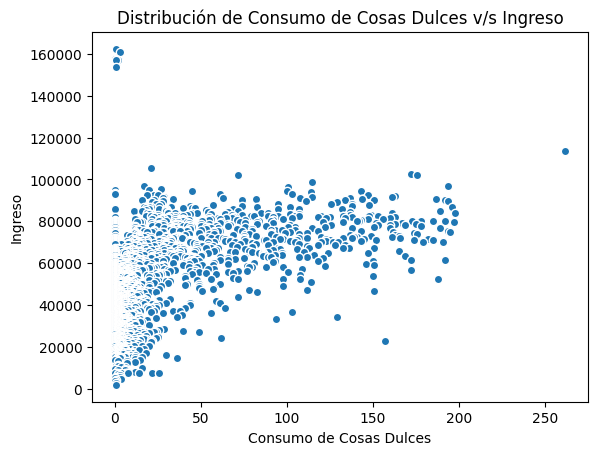

In [118]:
plt.scatter(x=df_marketing.MntSweetProducts, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Cosas Dulces")
plt.ylabel("Ingreso")
plt.title('Distribución de Consumo de Cosas Dulces v/s Ingreso')

Text(0.5, 1.0, 'Distribución de Consumo de Frutas v/s Ingreso')

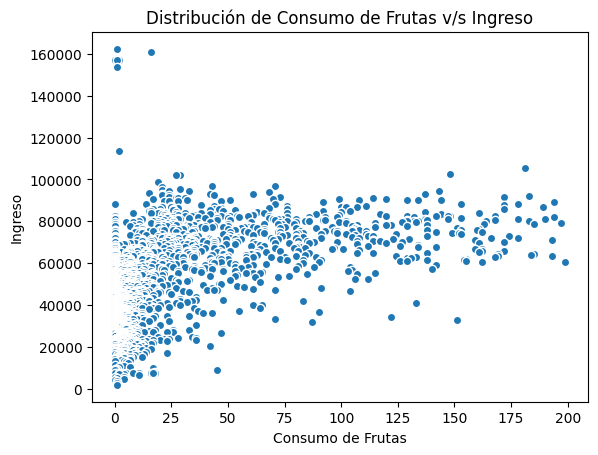

In [119]:
plt.scatter(x=df_marketing.MntFruits, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Frutas")
plt.ylabel("Ingreso")
plt.title('Distribución de Consumo de Frutas v/s Ingreso')

Text(0.5, 1.0, 'Distribución de Productos de oro v/s Ingreso')

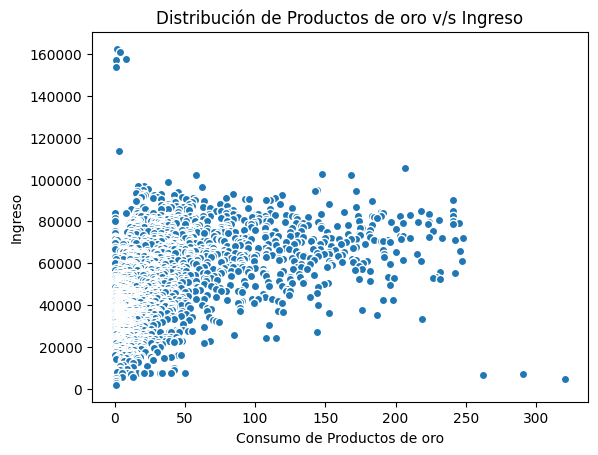

In [120]:
plt.scatter(x=df_marketing.MntGoldProds, y=df_marketing.Income, edgecolors="white")
plt.xlabel("Consumo de Productos de oro")
plt.ylabel("Ingreso")
plt.title('Distribución de Productos de oro v/s Ingreso')

Con las visualizaciones anteriores se identifica que productos como el vino o la carne son muy consumidos y en particular la diferencia de cantidades entre los consumidores, el rango o la diferencia de lo minimo y maximo de los que consumen en esos bienes es bastante grande. en cuando a los demas productos las cantidades consumidas es menor y mas concentrado.



---







# **5.- Validando el análisis anterior con dos herramientas automatizada para el EDA**#


Herramienta sweetviz

In [25]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.6 MB/s eta 0:00:00


In [27]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


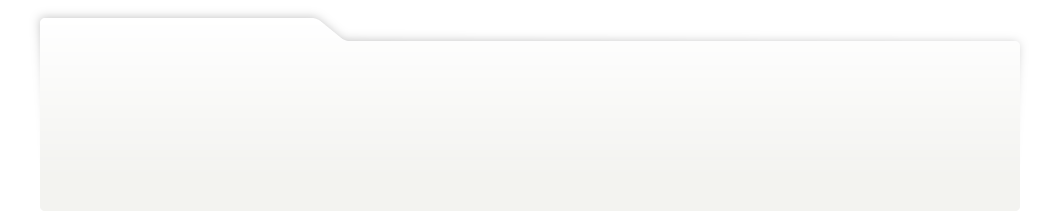
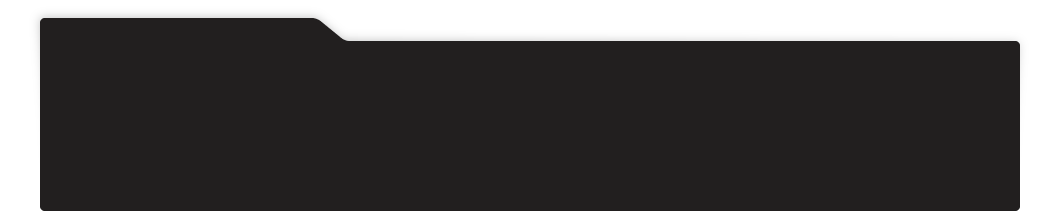
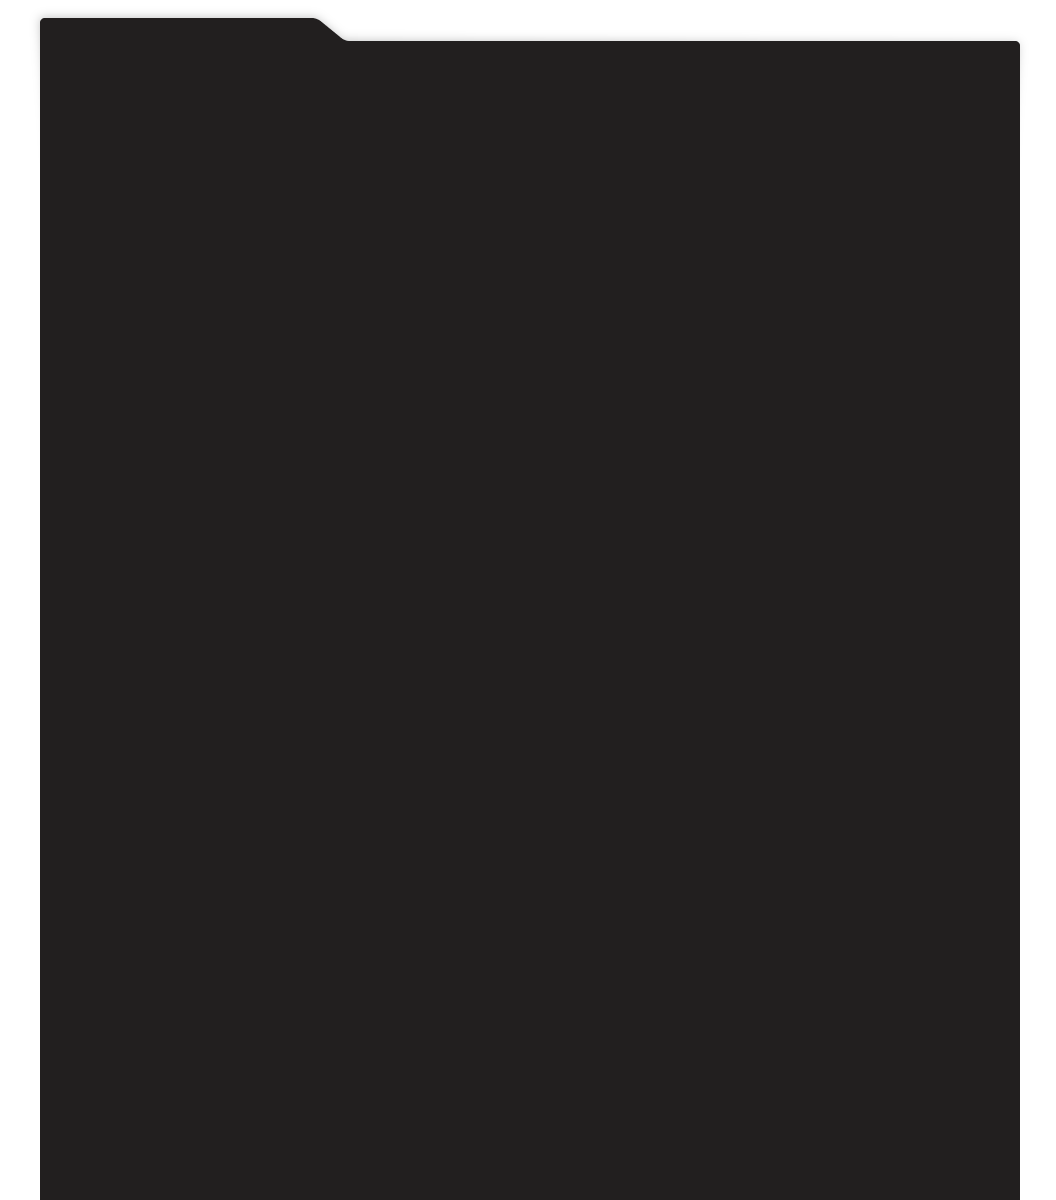
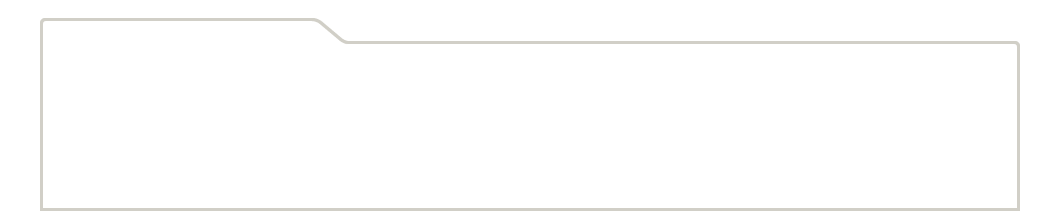
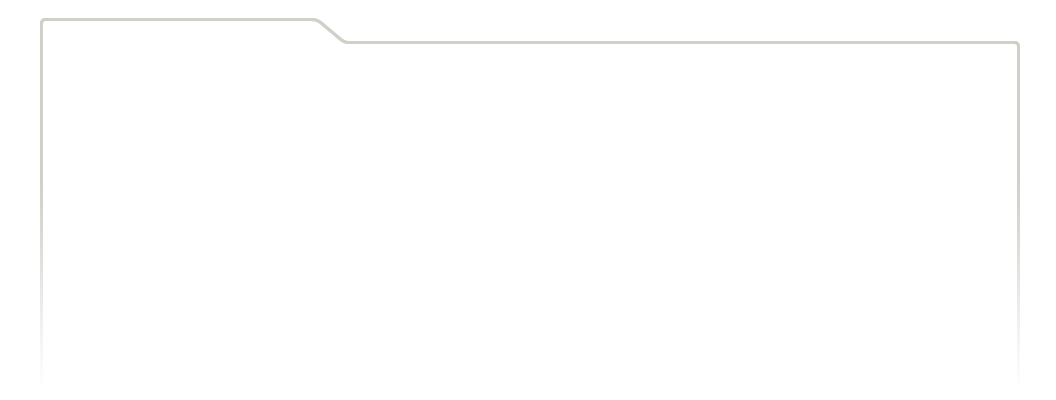
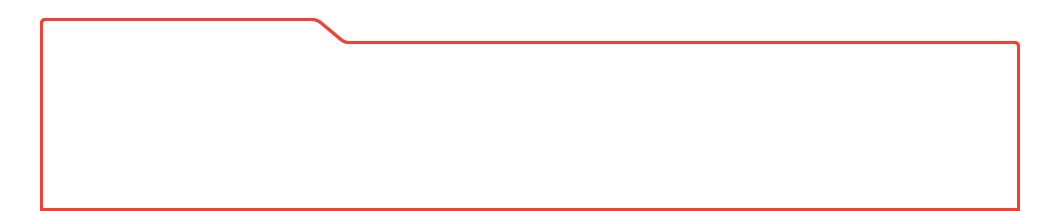
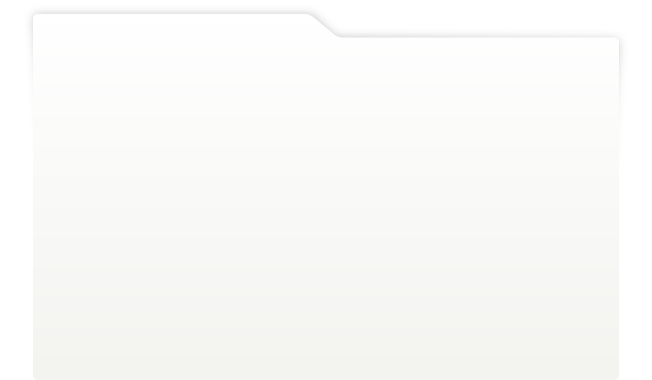
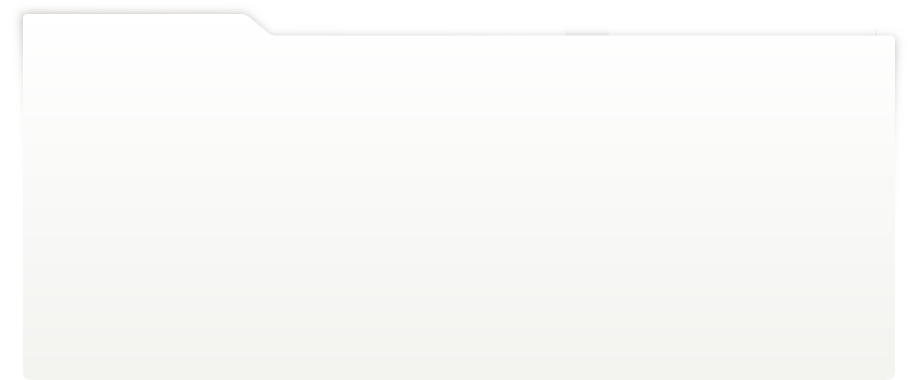
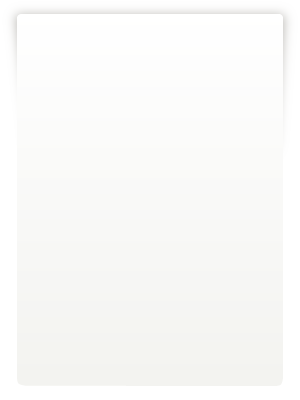
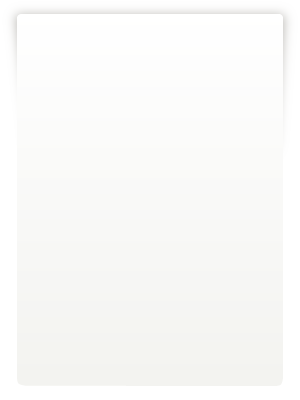
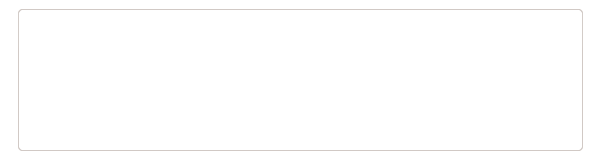
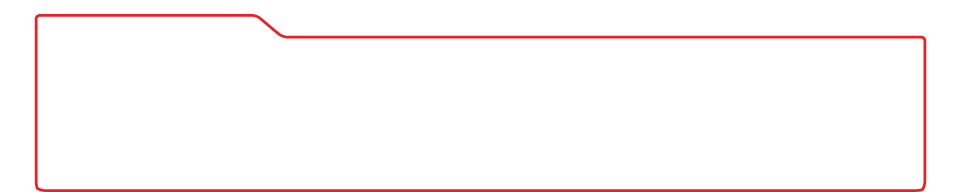
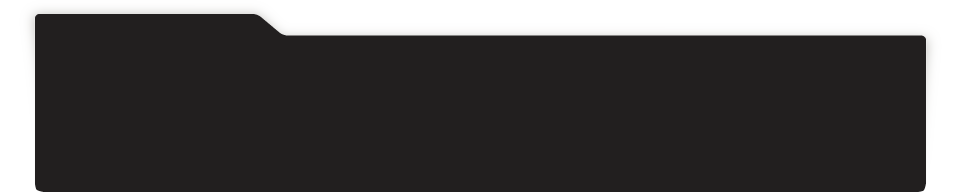
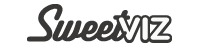
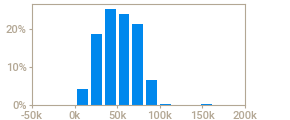
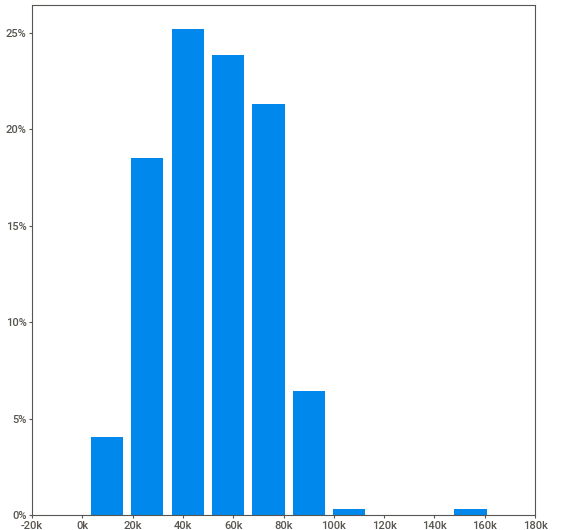
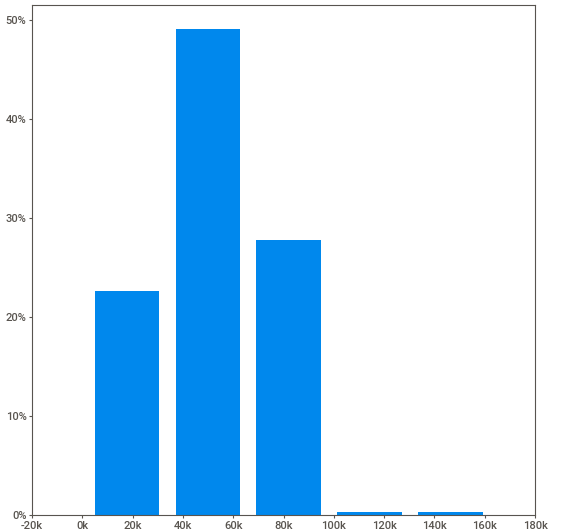
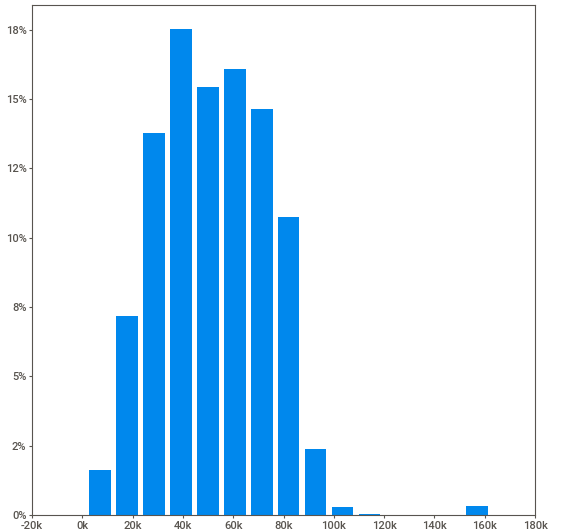
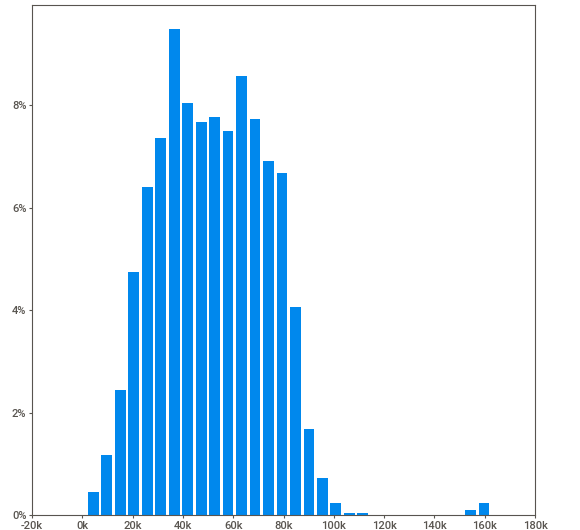
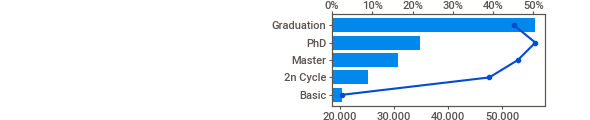
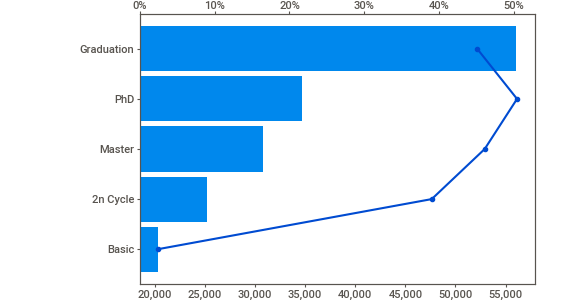
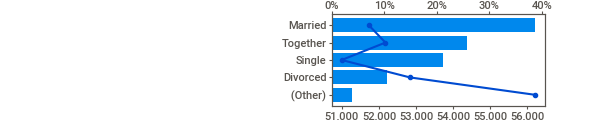
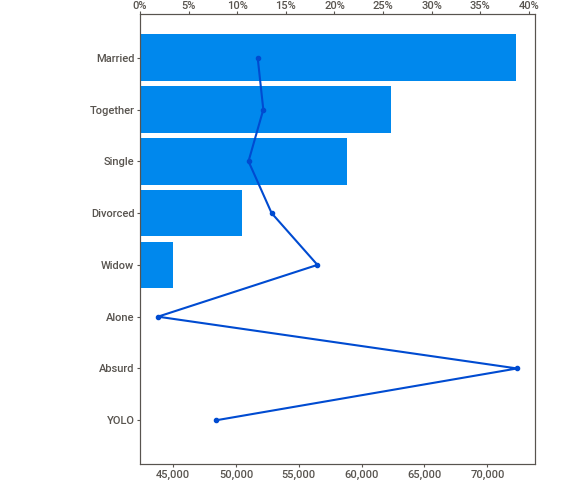
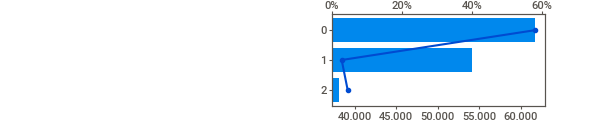
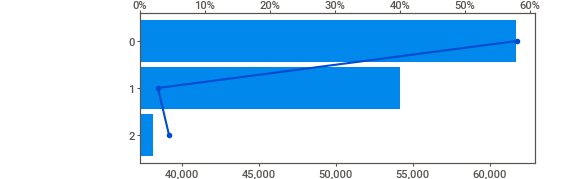
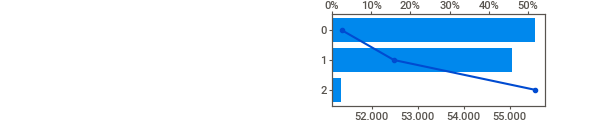
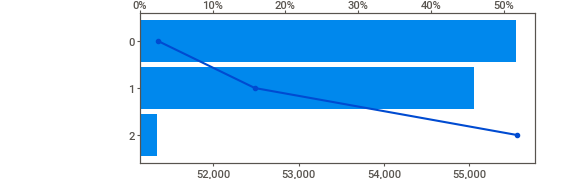
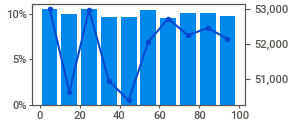
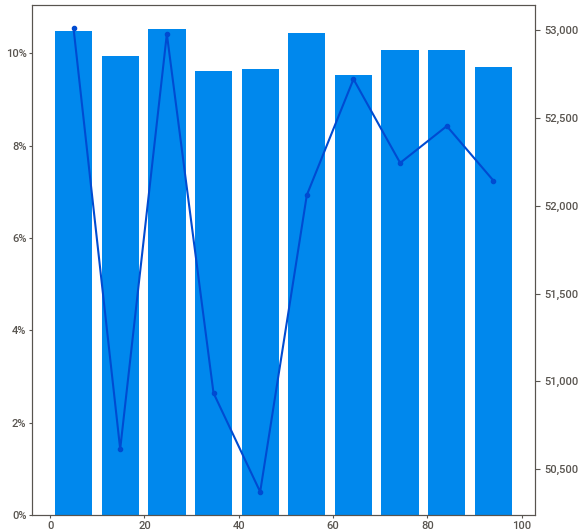
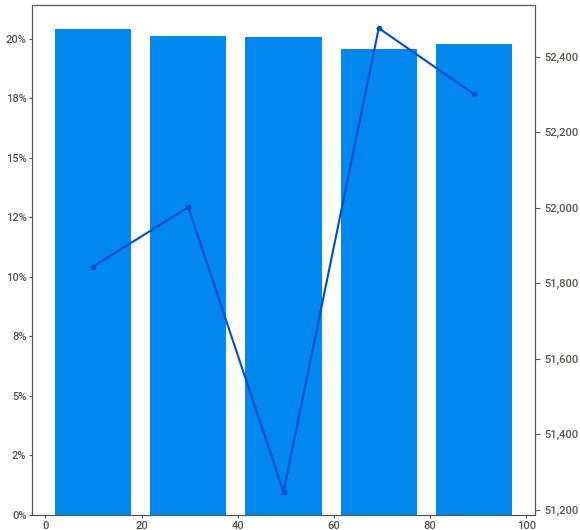
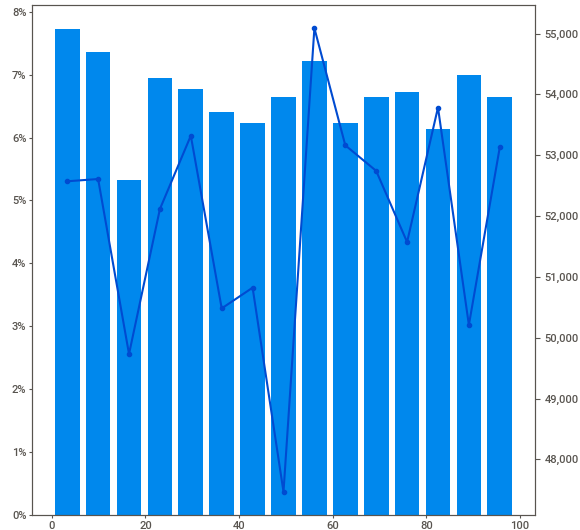
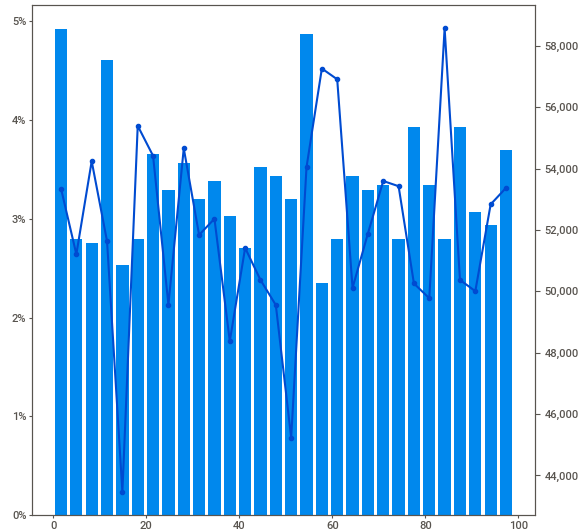
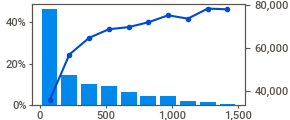
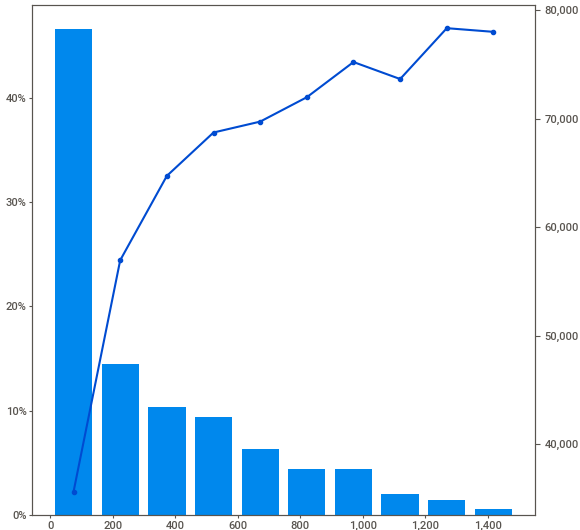
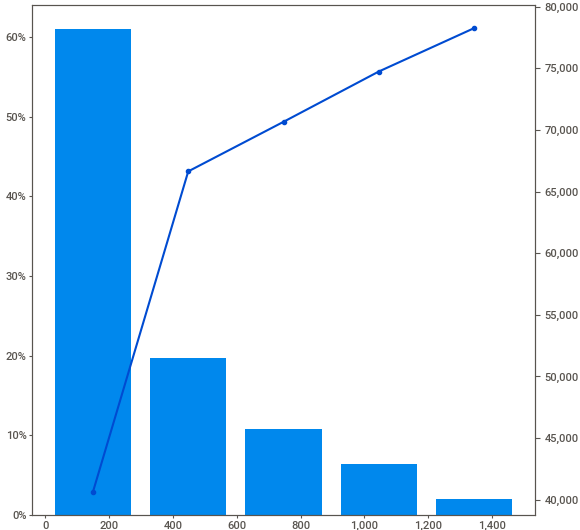
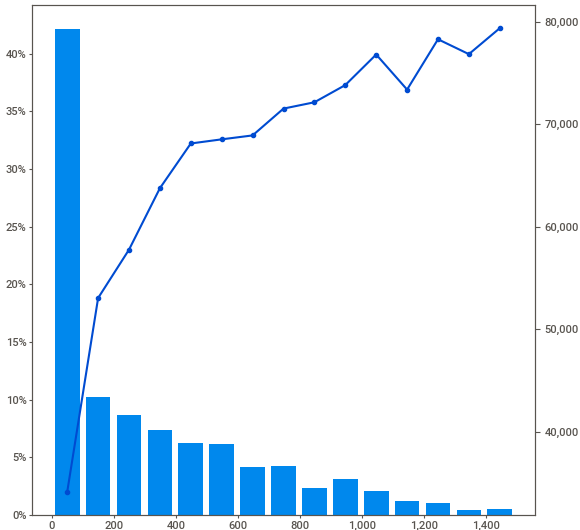
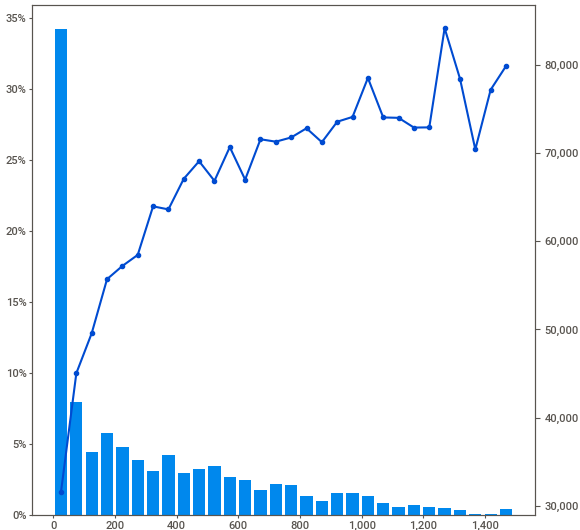
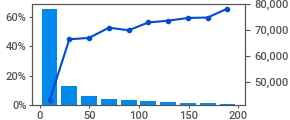
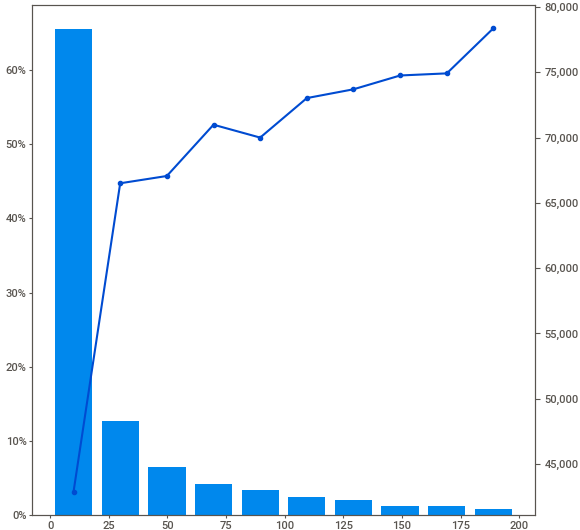
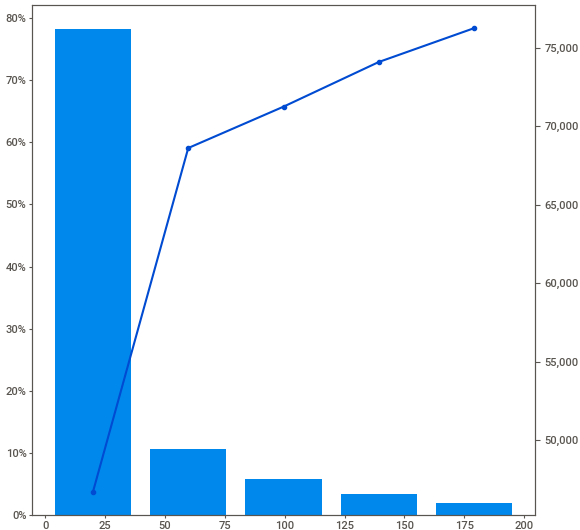
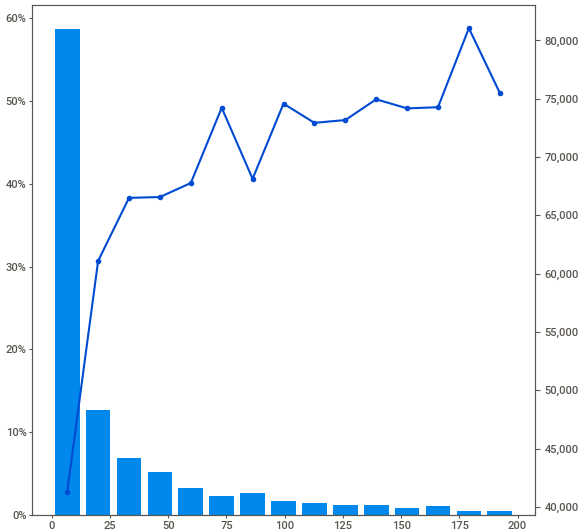
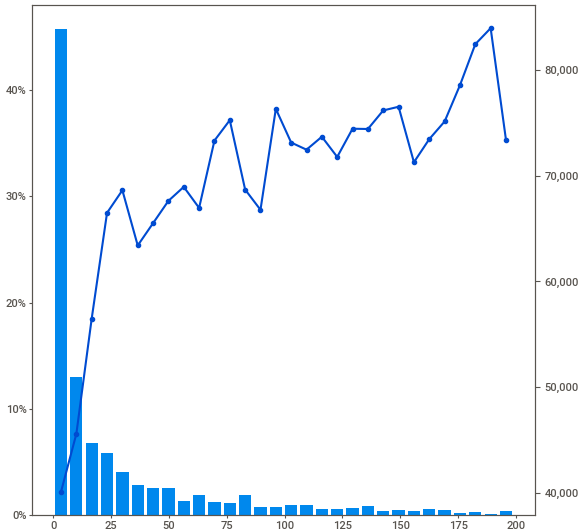
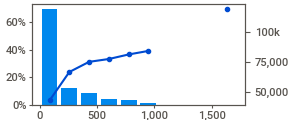
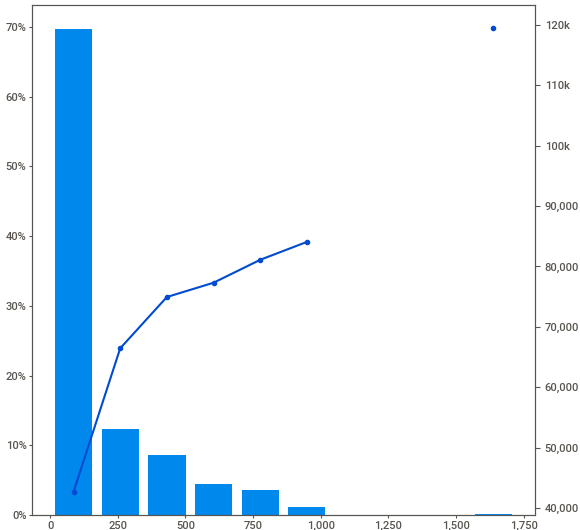
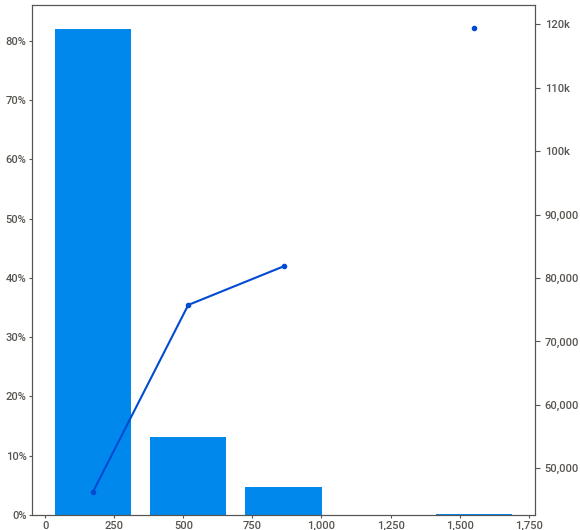
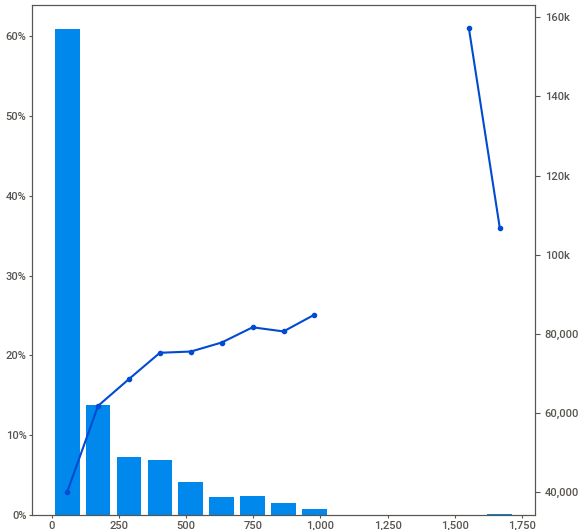
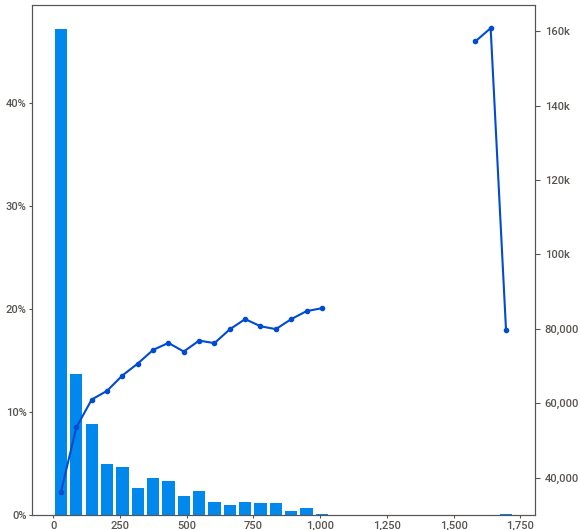
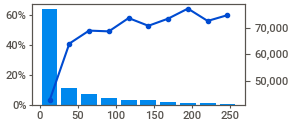
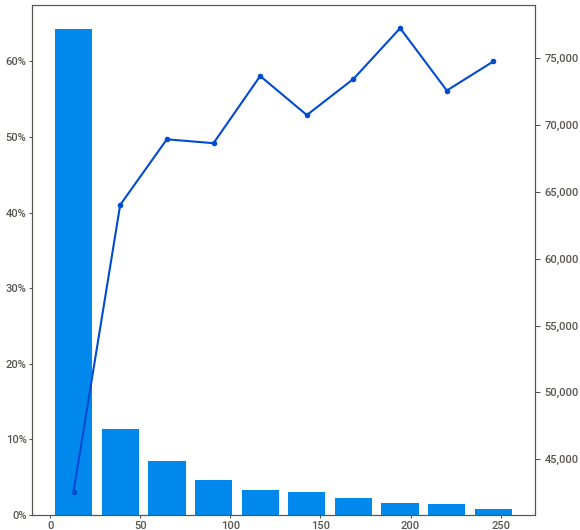
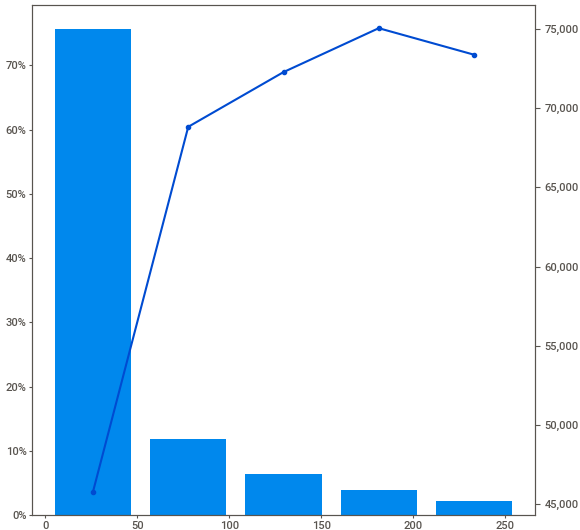
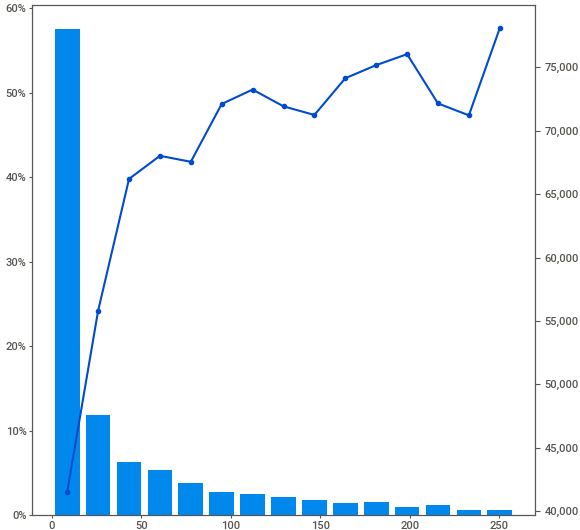
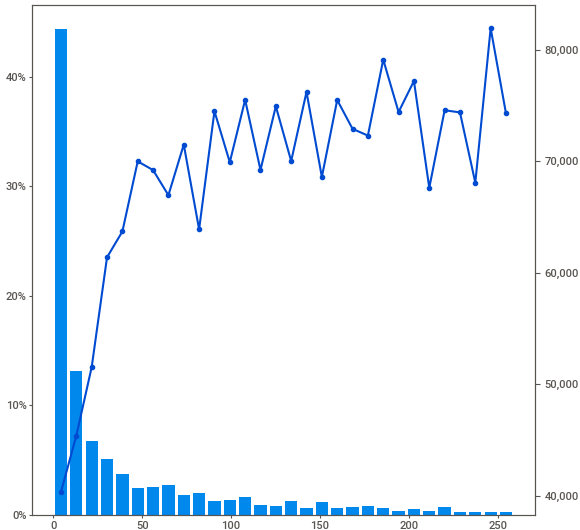
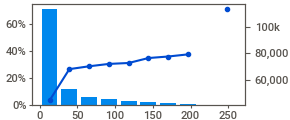
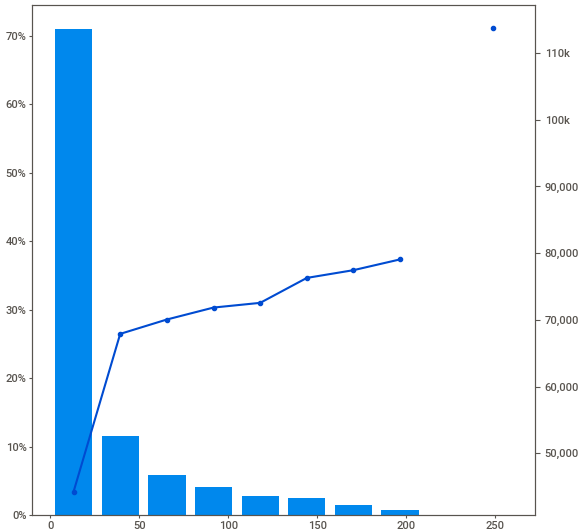
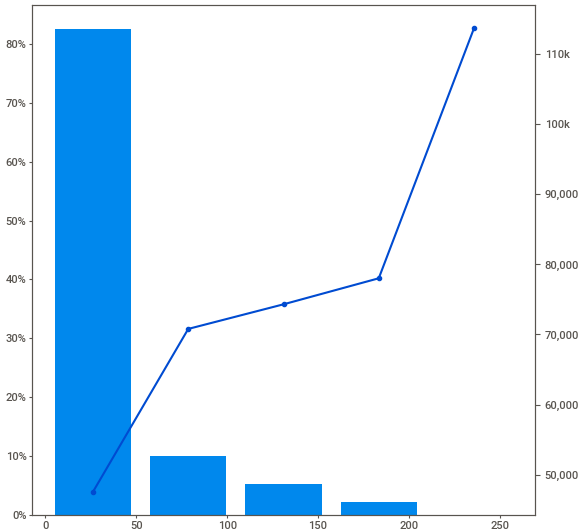
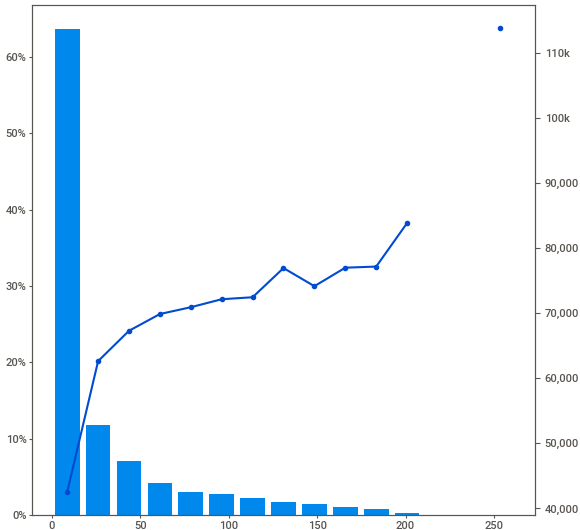
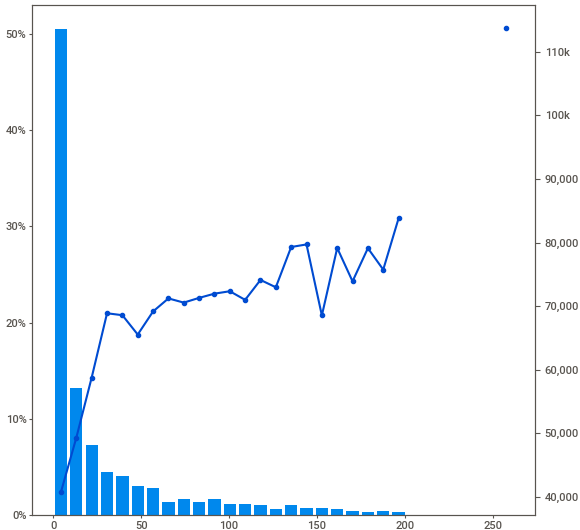
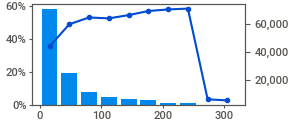
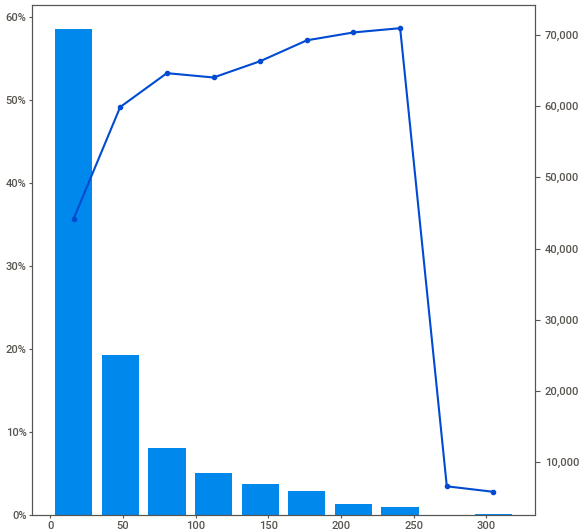
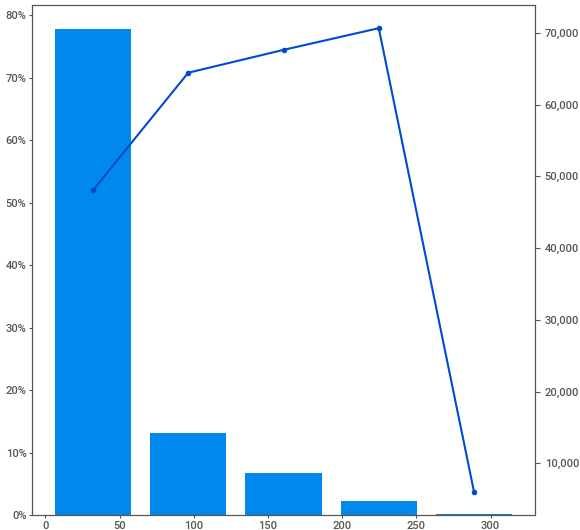
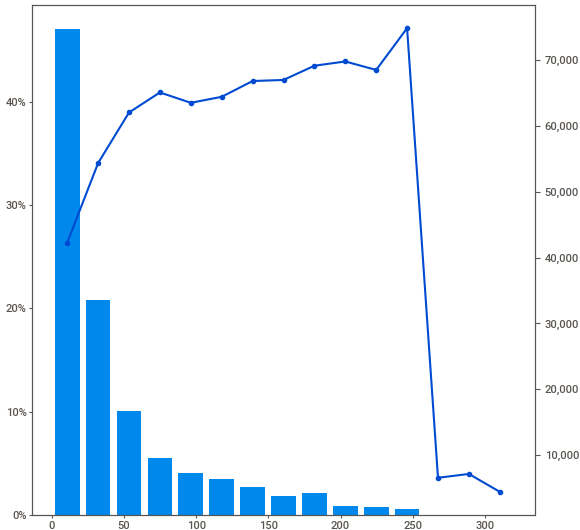
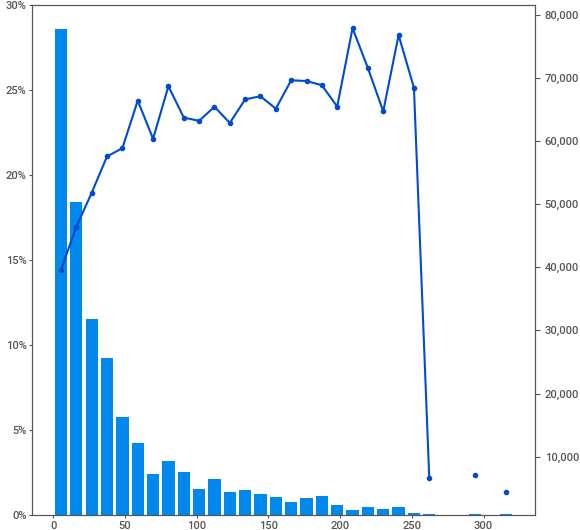
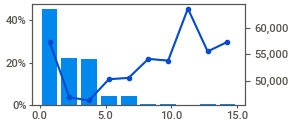
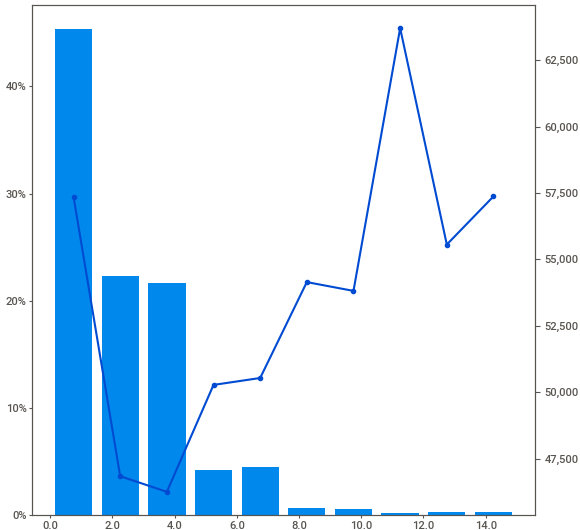
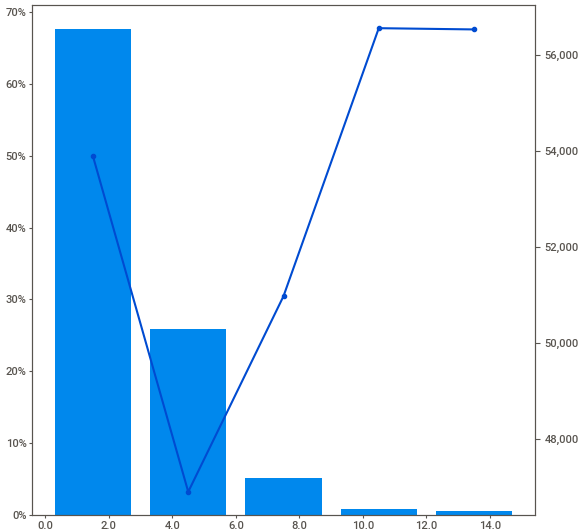
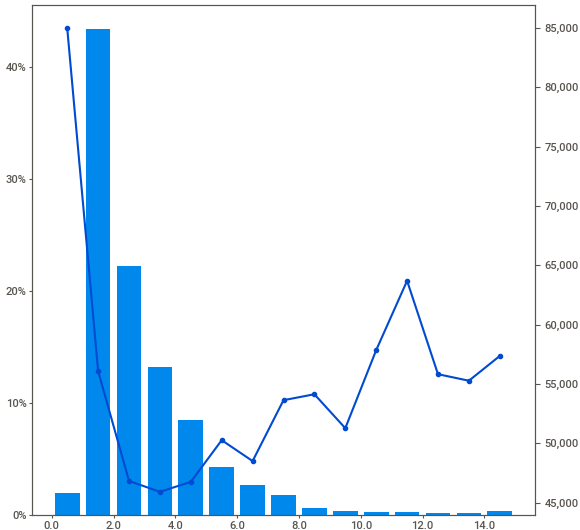
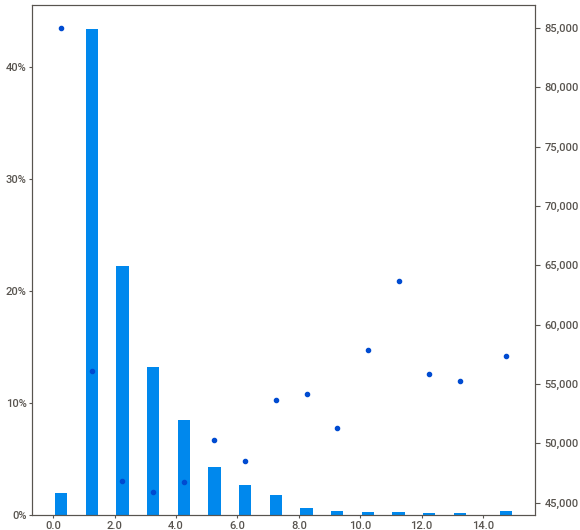
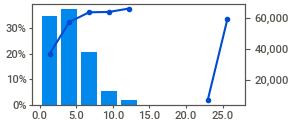
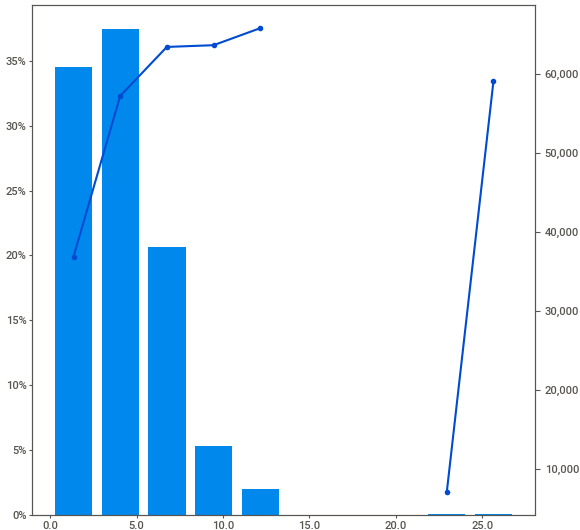
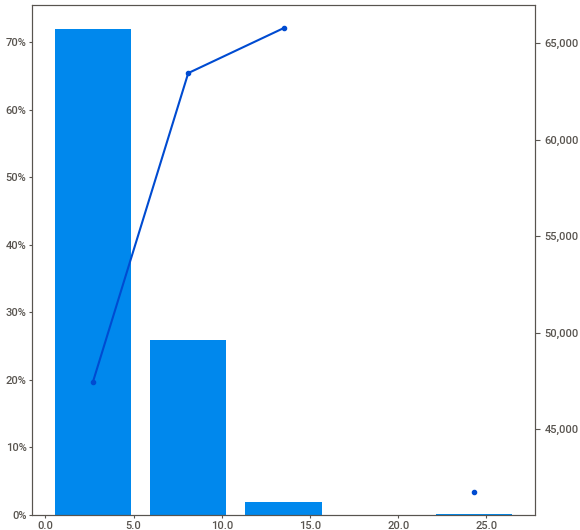
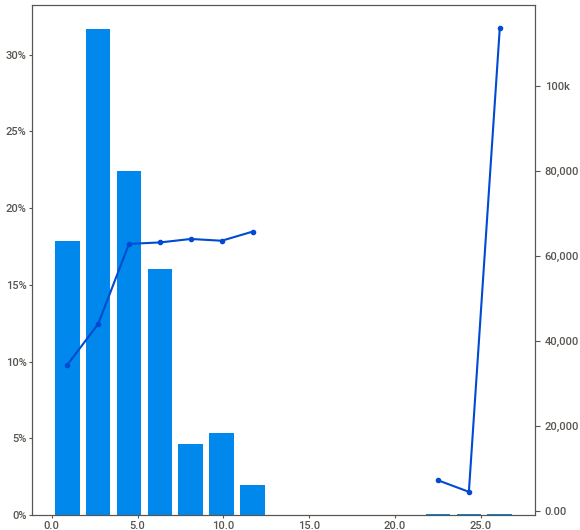
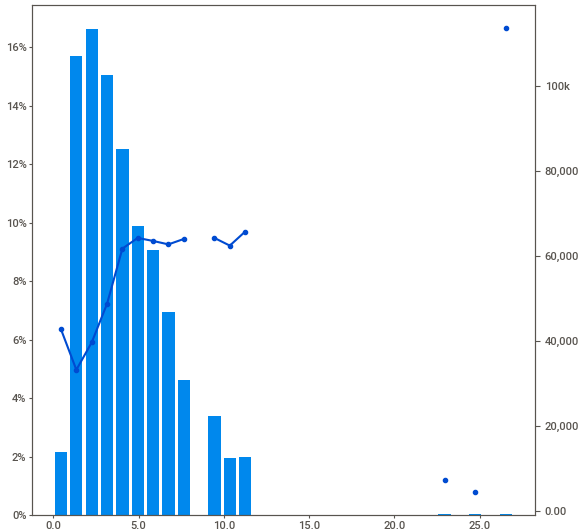
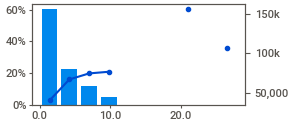
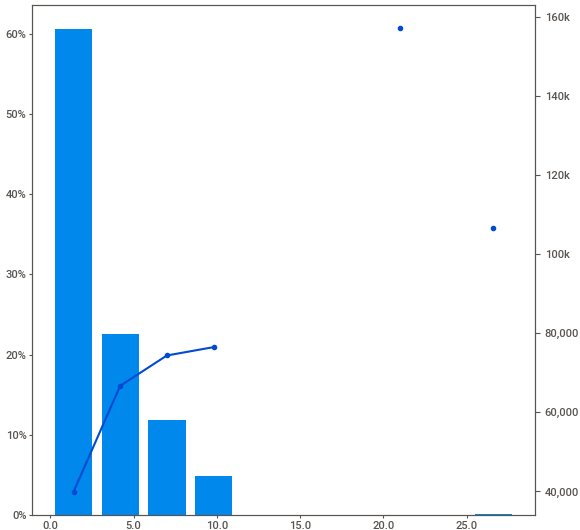
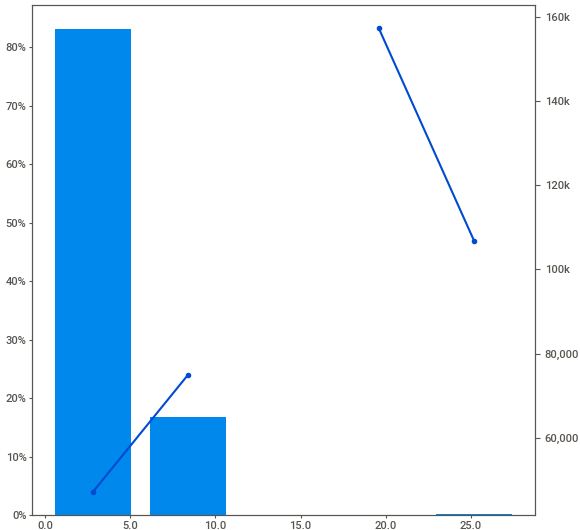
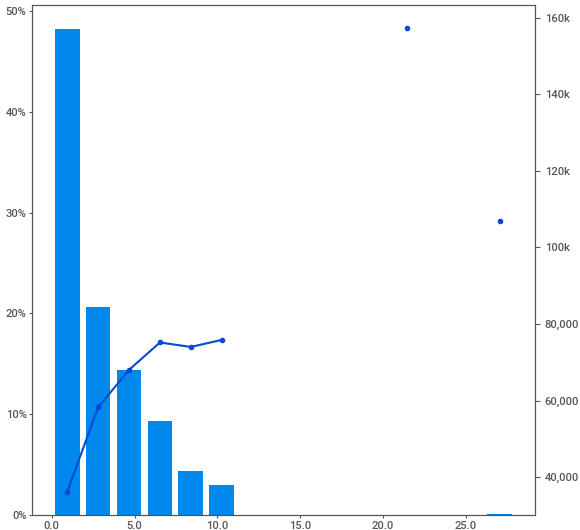
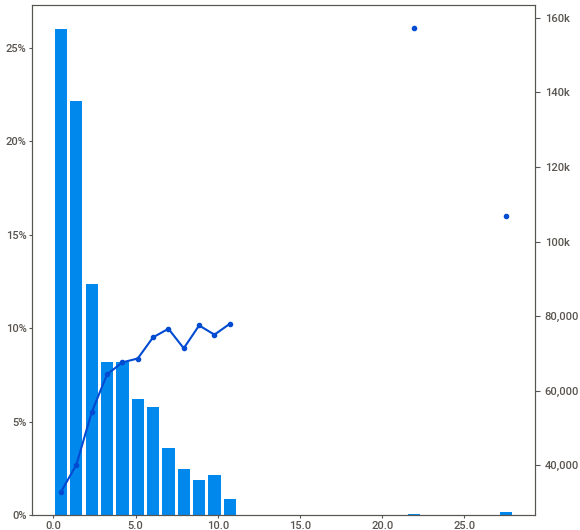
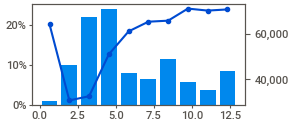
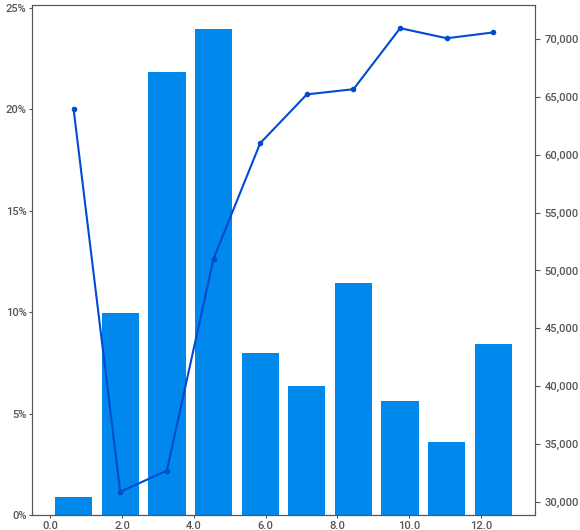
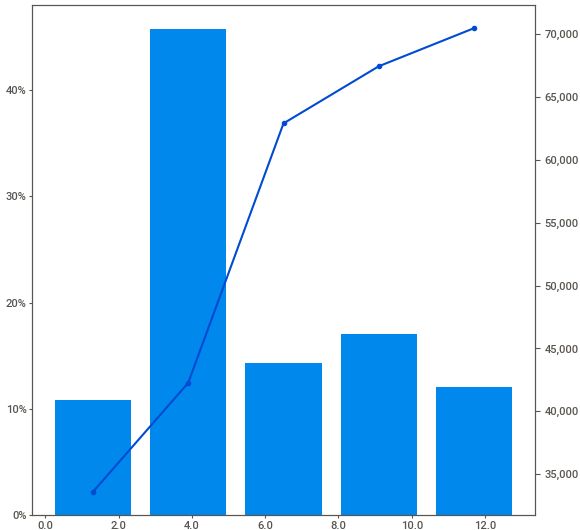
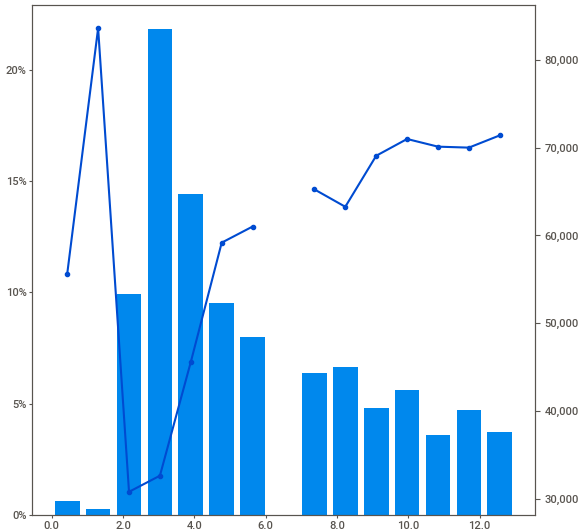
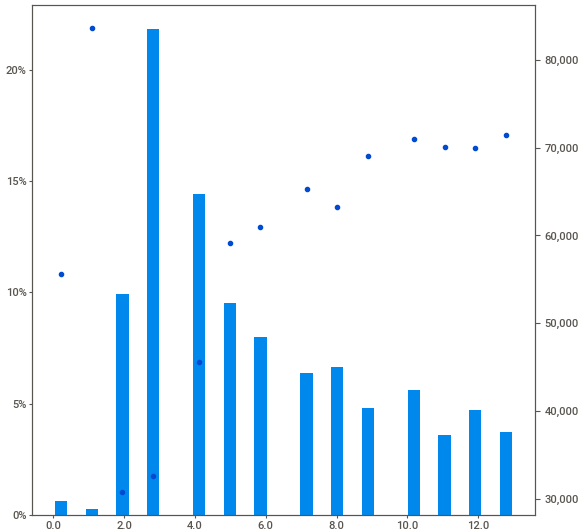
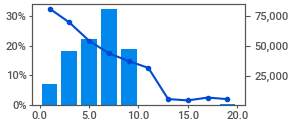
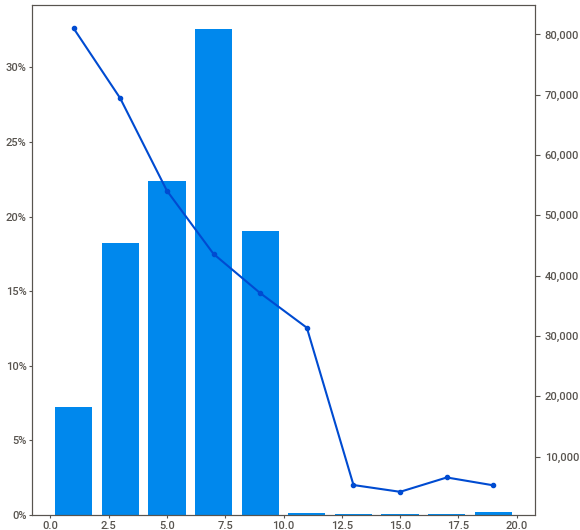
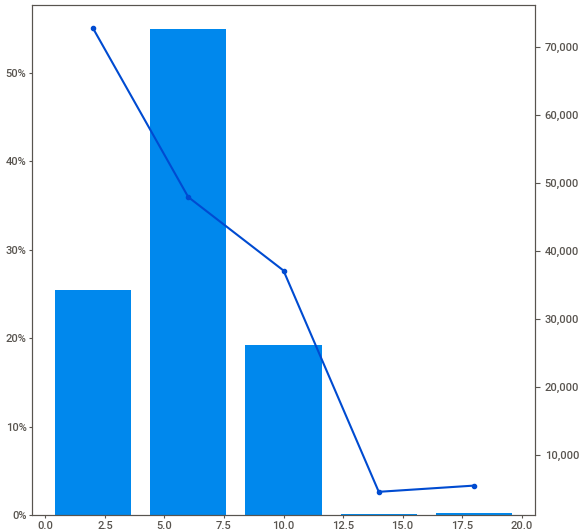
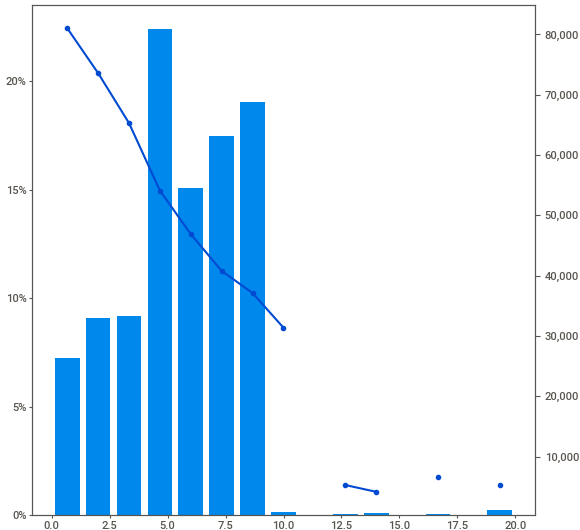
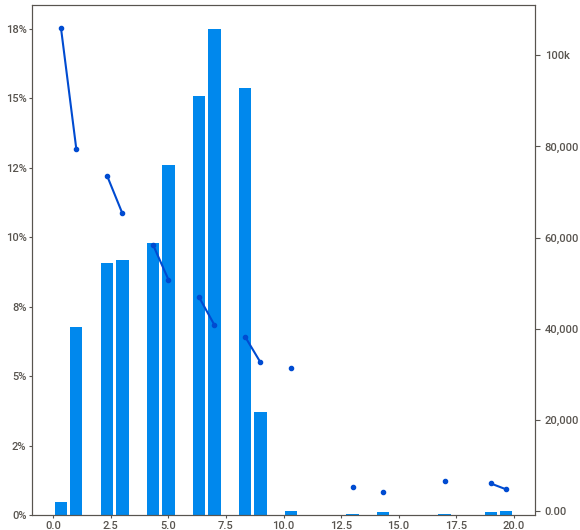
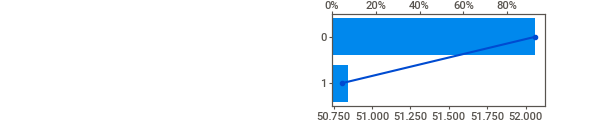
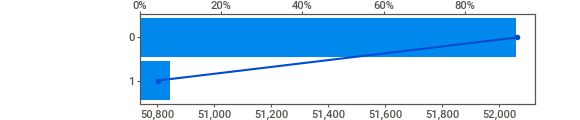
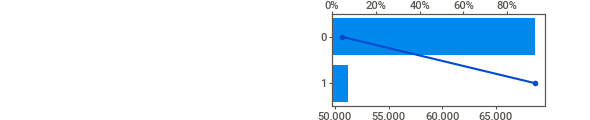
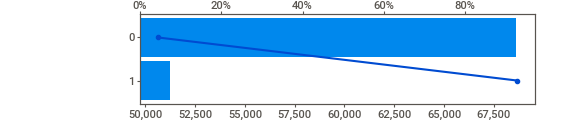
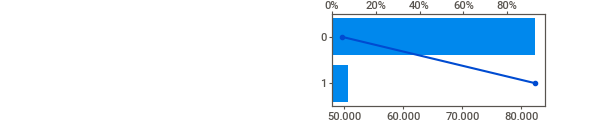
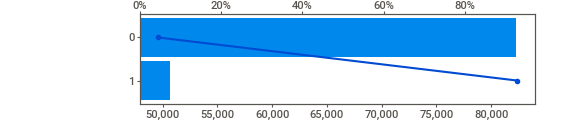
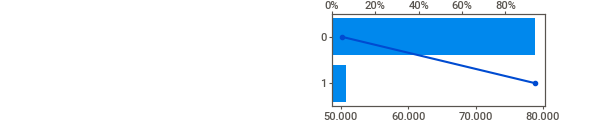
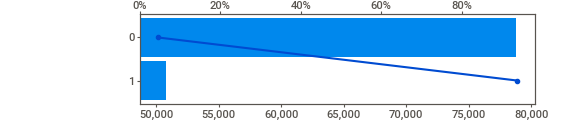
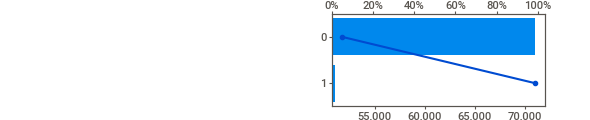
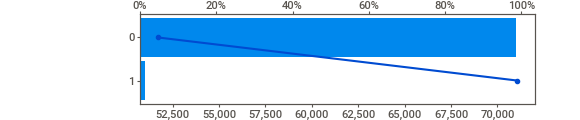
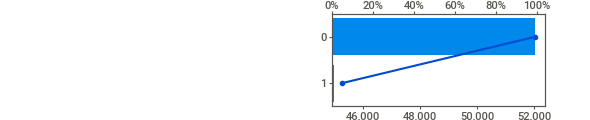
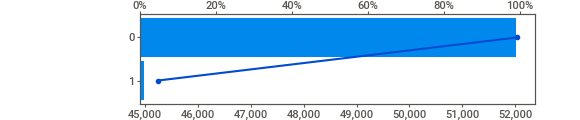
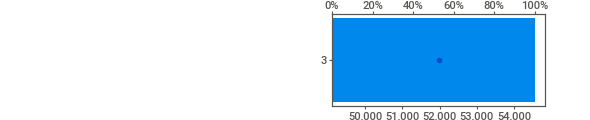
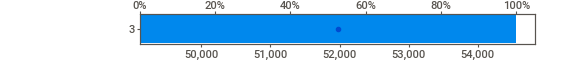
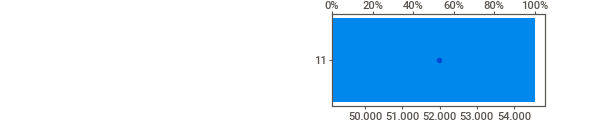
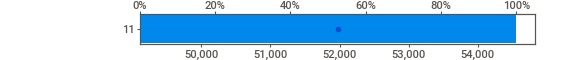
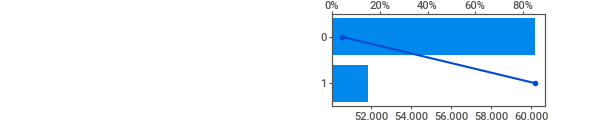
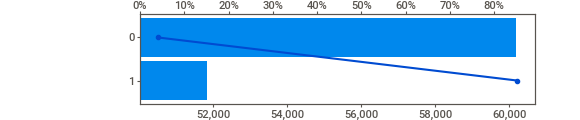
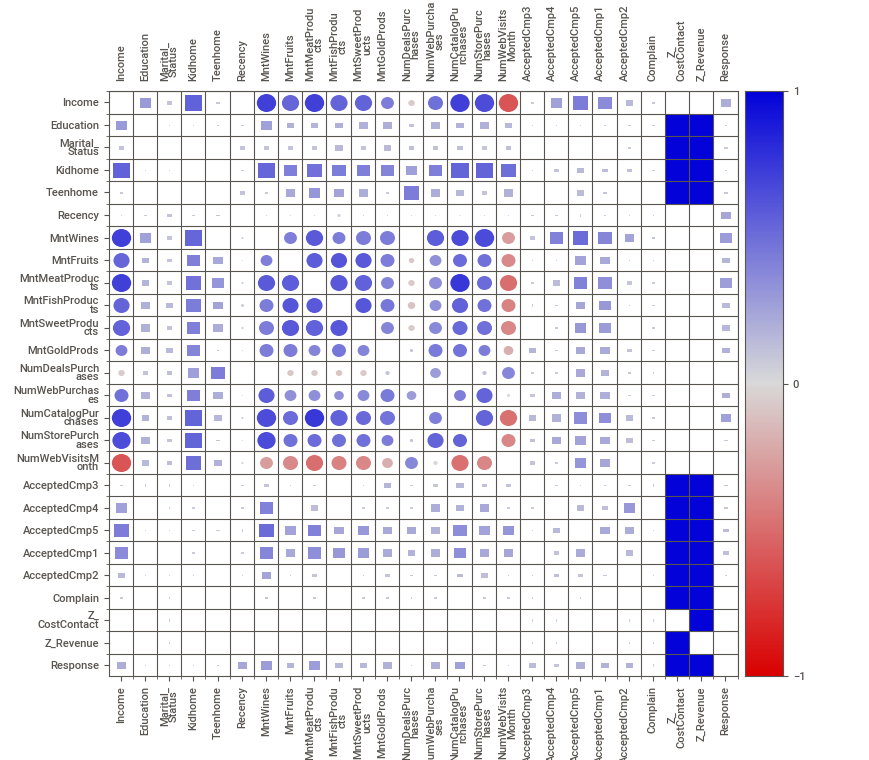
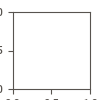

In [28]:
feature_config = sv.FeatureConfig(skip="ID", force_text=["Year_Birth"])
analyze_report = sv.analyze(df_marketing,'Income', feature_config)
analyze_report.show_notebook(w=1000, h=650, scale=0.8)

Herramienta Panda Profiling

In [29]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3812154acf00103b1aea2285da577c8bdd631b3ead4492d146faf50a5a03fccd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [30]:
from ydata_profiling import ProfileReport

In [31]:
profile = ProfileReport(df_marketing, title="Reporte en Panda Profiling")

In [32]:
profile.to_file("Supermercado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-----


# **6.- Preparando los datos para un proceso de ML**#

In [121]:
#esto lo utilizare despues para subdividir los datos para entrenar y testear
from sklearn.model_selection import train_test_split

In [122]:
#haremos una copia del dataset que veniamos usando
df_marketing_ml = df_marketing.copy()

In [123]:
df_marketing_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2215 non-null   int64 
 1   Year_Birth           2215 non-null   int64 
 2   Education            2215 non-null   object
 3   Marital_Status       2215 non-null   object
 4   Income               2215 non-null   int64 
 5   Kidhome              2215 non-null   int64 
 6   Teenhome             2215 non-null   int64 
 7   Dt_Customer          2215 non-null   object
 8   Recency              2215 non-null   int64 
 9   MntWines             2215 non-null   int64 
 10  MntFruits            2215 non-null   int64 
 11  MntMeatProducts      2215 non-null   int64 
 12  MntFishProducts      2215 non-null   int64 
 13  MntSweetProducts     2215 non-null   int64 
 14  MntGoldProds         2215 non-null   int64 
 15  NumDealsPurchases    2215 non-null   int64 
 16  NumWeb

In [124]:
#Sacare columnas que no usare
df_marketing_ml=df_marketing_ml.drop(['Year_Birth', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

In [125]:
df_marketing_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                2215 non-null   int64 
 1   Education         2215 non-null   object
 2   Marital_Status    2215 non-null   object
 3   Income            2215 non-null   int64 
 4   Kidhome           2215 non-null   int64 
 5   Teenhome          2215 non-null   int64 
 6   MntWines          2215 non-null   int64 
 7   MntFruits         2215 non-null   int64 
 8   MntMeatProducts   2215 non-null   int64 
 9   MntFishProducts   2215 non-null   int64 
 10  MntSweetProducts  2215 non-null   int64 
 11  MntGoldProds      2215 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 207.8+ KB


In [126]:
#divido el dataset en los parametros y el target que quier alcanzar.
df_marketing_ml_targets = df_marketing_ml.drop(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome'], axis=1)
df_marketing_ml_params = df_marketing_ml.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1)

In [127]:
df_marketing_ml_params

ID   Education Marital_Status  Income  Kidhome  Teenhome
0      1503         PhD       Together  162397        1         1
1      1501         PhD        Married  160803        0         0
2      5336      Master       Together  157733        1         0
3      8475         PhD        Married  157243        0         1
4      4931  Graduation       Together  157146        0         0
...     ...         ...            ...     ...      ...       ...
2210  10311  Graduation        Married    4428        0         1
2211   9931         PhD        Married    4023        1         1
2212  11110  Graduation         Single    3502        1         0
2213   5376  Graduation        Married    2447        1         0
2214   6862  Graduation       Divorced    1730        0         0

[2215 rows x 6 columns]

In [128]:
df_marketing_ml_targets

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0           85          1               16                2                 1   
1           55         16             1622               17                 3   
2           39          1                9                2                 0   
3           20          2             1582                1                 2   
4            1          0             1725                2                 1   
...        ...        ...              ...              ...               ...   
2210        16          4               12                2                 4   
2211         5          0                1                1                 1   
2212         2          1                1                0                 0   
2213         1          1             1725                1                 1   
2214         1          1                3                1                 1   

      MntGoldProds  
0                2  
1                4  
2                8  
3                1  
4                1  
...            ...  
2210           321  
2211             1  
2212             1  
2213             1  
2214             1  

[2215 rows x 6 columns]

*   **Division del dataset**

In [129]:
original_count = len(df_marketing_ml)
training_size = 0.7
test_size = (1 - training_size) / 2

training_count = int(original_count * training_size)
test_count = int(original_count * test_size)
validation_count = original_count - training_count - test_count
print(training_count, test_count, validation_count, original_count)

1550 332 333 2215


In [130]:
from sklearn.model_selection import train_test_split
train_x, rest_x, train_y, rest_y = train_test_split(df_marketing_ml_params, df_marketing_ml_targets, train_size=training_count, random_state=42)

In [131]:
test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, train_size=test_count, random_state=42)

In [132]:
print(len(train_x), len(train_y), len(validate_x), len(validate_y))

1550 1550 333 333


# **7.- Armando Modelo**#

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [134]:
from sklearn.preprocessing import Binarizer

In [135]:
from sklearn.preprocessing import RobustScaler

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

In [137]:
one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "Education",
            "Marital_Status"
        ]
    )
])

In [138]:
scaler = ColumnTransformer([
    ("scaler", RobustScaler(), ["Income"])
])

In [139]:
binarizer = ColumnTransformer([
    (
        'binarizer',
        Binarizer(),
        [
            "Kidhome",
            "Teenhome",
        ]
    )
])

one_hot_binarized = Pipeline([
    ("binarizer", binarizer),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

In [140]:
pipelineando = Pipeline(
    [
        (
            "features",
            FeatureUnion(
                [
                    ("categorical", one_hot_encoding),
                    ("scaled", scaler),
                    ("categorical_binarized", one_hot_binarized),

                ]
            ),
        )
    ]
)

In [141]:
#Siempre sera mi Pipeline, antes de entrenar asi ya lo puedo usar cuando quiera...
pipelineando

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['Education',
                                                                                   'Marital_Status'])])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['Income'])])),
                                                ('categorical_binarized',
                                                 Pipeline(steps=[('binarizer',
                                                                  ColumnTransformer(transformers=[('binarizer',
                                                                                                   Binarizer(),
                                                                                                   ['Kidhome',
                                                                                                    'Teenhome'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))]))]))])

In [142]:
pipelineando.fit(train_x)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['Education',
                                                                                   'Marital_Status'])])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['Income'])])),
                                                ('categorical_binarized',
                                                 Pipeline(steps=[('binarizer',
                                                                  ColumnTransformer(transformers=[('binarizer',
                                                                                                   Binarizer(),
                                                                                                   ['Kidhome',
                                                                                                    'Teenhome'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))]))]))])

In [143]:
transform_x = pipelineando.transform(train_x)

In [144]:
train_x.shape

(1550, 6)

In [145]:
transform_x.shape


(1550, 18)

*   **Entrenando el Modelo**

In [146]:
from sklearn.base import clone

pipelineador_transformer = clone(pipelineando)

pipelineador_train_x = pipelineador_transformer.fit_transform(train_x)
pipelineador_validate_x = pipelineador_transformer.transform(validate_x)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = RandomForestClassifier(n_estimators=100)

model.fit(pipelineador_train_x, train_y)

RandomForestClassifier()

*   **Validando el Modelo**

In [148]:
from sklearn.metrics import accuracy_score, recall_score

pred_y = model.predict(pipelineador_validate_x)

In [149]:

print("accuracy de Prediccion de consumo de Vino:", accuracy_score(validate_y.MntWines, pred_y[:,0]))
print("accuracy de Prediccion de consumo de Frutas:", accuracy_score(validate_y.MntFruits , pred_y[:,1]))
print("accuracy de Prediccion de consumo de Carnes Rojas:", accuracy_score(validate_y.MntMeatProducts , pred_y[:,2]))
print("accuracy de Prediccion de consumo de Pescado:", accuracy_score(validate_y.MntFishProducts , pred_y[:,3]))
print("accuracy de Prediccion de consumo de Productos Dulces:", accuracy_score(validate_y.MntSweetProducts , pred_y[:,4]))
print("accuracy de Prediccion de consumo de Productos de Oro:", accuracy_score(validate_y.MntGoldProds , pred_y[:,5]))


accuracy de Prediccion de consumo de Vino: 0.15015015015015015
accuracy de Prediccion de consumo de Frutas: 0.2072072072072072
accuracy de Prediccion de consumo de Carnes Rojas: 0.15915915915915915
accuracy de Prediccion de consumo de Pescado: 0.22522522522522523
accuracy de Prediccion de consumo de Productos Dulces: 0.2012012012012012
accuracy de Prediccion de consumo de Productos de Oro: 0.16216216216216217


In [150]:
dataset_xfinal = pd.concat([train_x, validate_x])
dataset_yfinal = pd.concat([train_y, validate_y])

In [151]:
dataset_xfinal

ID   Education Marital_Status  Income  Kidhome  Teenhome
1565  3007  Graduation       Together   37758        1         1
343   4390  Graduation       Together   75315        0         1
398   3859         PhD       Together   73059        0         1
584   7072  Graduation        Married   67432        0         1
2104  6682       Basic        Married   18978        1         0
...    ...         ...            ...     ...      ...       ...
185   2150         PhD          Widow   80995        0         1
2206  4246      Master         Single    6560        0         0
1005  7129         PhD        Married   54693        0         1
2082  5150       Basic         Single   20194        1         0
1915  2256      Master        Married   27159        1         1

[1883 rows x 6 columns]

In [152]:
dataset_yfinal

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1565        27          2               10                0                 0   
343        459         15              171              142                23   
398        410        112              420                0                82   
584        432         79              341              177               136   
2104         2          8                1                4                 7   
...        ...        ...              ...              ...               ...   
185        860         28              409               73                56   
2206        67         11               26                4                 3   
1005       686         17              142               23                26   
2082         0          4                7               11                10   
1915        17          0                3                0                 0   

      MntGoldProds  
1565             1  
343             31  
398             71  
584            170  
2104            15  
...            ...  
185             56  
2206           262  
1005            35  
2082            15  
1915             1  

[1883 rows x 6 columns]

In [153]:
pipelineador_xfinal = pipelineador_transformer.fit_transform(dataset_xfinal)

In [154]:
pred_yfinal = model.predict(pipelineador_xfinal)

Acuracy de datos de Entrenamiento mas datos de validacion

In [155]:
print("accuracy de Prediccion de consumo de Vino:", accuracy_score(dataset_yfinal.MntWines, pred_yfinal[:,0]))
print("accuracy de Prediccion de consumo de Frutas:", accuracy_score(dataset_yfinal.MntFruits , pred_yfinal[:,1]))
print("accuracy de Prediccion de consumo de Carnes Rojas:", accuracy_score(dataset_yfinal.MntMeatProducts , pred_yfinal[:,2]))
print("accuracy de Prediccion de consumo de Pescado:", accuracy_score(dataset_yfinal.MntFishProducts , pred_yfinal[:,3]))
print("accuracy de Prediccion de consumo de Productos Dulces:", accuracy_score(dataset_yfinal.MntSweetProducts , pred_yfinal[:,4]))
print("accuracy de Prediccion de consumo de Productos de Oro:", accuracy_score(dataset_yfinal.MntGoldProds , pred_yfinal[:,5]))

accuracy de Prediccion de consumo de Vino: 0.5077004779607011
accuracy de Prediccion de consumo de Frutas: 0.5432819968135953
accuracy de Prediccion de consumo de Carnes Rojas: 0.5087626128518322
accuracy de Prediccion de consumo de Pescado: 0.5443441317047265
accuracy de Prediccion de consumo de Productos Dulces: 0.5443441317047265
accuracy de Prediccion de consumo de Productos de Oro: 0.5114179500796601


GUARDANDO EL MODELO

In [162]:
from joblib import dump

dump(pipelineando, "supermarket_pipeline.joblib")

['supermarket_pipeline.joblib']